# 0.0. Imports:

In [118]:
import pandas as pd

import inflection 

import math

import nbextensions

import datetime

import seaborn as sns


from scipy                 import stats as ss
from matplotlib            import pyplot as plt
from IPython.core.display  import HTML 
from IPython.display       import Image

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler as mns


import matplotlib.gridspec as gridSpec

# 0.1. Loading data:

In [2]:
df_sales_raw = pd.read_csv( 'train.csv', low_memory=False )

df_store_raw = pd.read_csv( 'store.csv', low_memory=False )

#merge

df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store')

In [3]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
431997,163,1,2014-06-09,0,0,0,0,a,0,a,a,1480.0,4.0,2009.0,0,NaN,NaN,NaN


# 1.0. Data description:

In [4]:
df1 = df_raw.copy()

In [5]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.1 Rename Columns:

In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

In [8]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

# 1.2. Data Dimensions:

In [9]:
print ( 'Number of Rows: {}'.format( df1.shape[0] ) )
print ( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


# 1.3. Data Types:

In [10]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [11]:
df1['date'] = pd.to_datetime(df1['date'])

In [12]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

# 1.4. Check 'NAs':

In [13]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

# 1.5. Fillout 'NA':

In [14]:
# competition_distance              2642
# competition_open_since_month    323348
# competition_open_since_year     323348
# promo2                               0
# promo2_since_week               508031
# promo2_since_year               508031
# promo_interval                  508031                

In [15]:
# competition_distance:

df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

In [16]:
# competition_open_since_month:

df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

In [17]:
# competition_open_since_year:

df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 ) 

In [18]:
# promo2_since_week:

df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

In [19]:
# promo2_since_year:

df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

In [20]:
# promo_interval:

month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' }

df1['promo_interval'].fillna(0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval','month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1 )

In [21]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [22]:
df1.sample(5).T

,782228,661858,391243,312621,626081
store,284,334,708,603,237
day_of_week,2,5,6,6,2
date,2013-07-30 00:00:00,2013-11-15 00:00:00,2014-07-19 00:00:00,2014-10-11 00:00:00,2013-12-17 00:00:00
sales,8914,5138,0,6445,5862
customers,622,550,0,925,686
open,1,1,0,1,1
promo,1,0,0,0,1
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,d,d,c,a,a


# 1.6. Change Types:

In [23]:
df1 = df1.copy()

In [24]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [25]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')

In [26]:
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( 'int64' ) 

In [27]:
df1['promo2_since_week'] = df1['promo2_since_week'].astype( 'int64' ) 

In [28]:
df1['promo2_since_year'] = df1['promo2_since_year'].astype( 'int64' )  

In [29]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

# 1.7. Descriptive Statistical:

In [30]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'] )

cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64[ns]'] )

In [31]:
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
825701,272,5,7433,735,1,1,0,16180.0,7,2003,1,14,2011,0
743898,979,2,4285,531,1,0,0,2270.0,11,2005,1,14,2011,0


In [32]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
350884,0,c,c,"Jan,Apr,Jul,Oct",Aug
746715,0,a,a,"Jan,Apr,Jul,Oct",Aug


# 1.7.1 Numerical Attributes:

In [33]:
import numpy as np

In [34]:
# Central Tendency - mean, median:

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame( num_attributes.apply(  np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply(  min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# Concatenate:
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns =  [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ] 

In [35]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


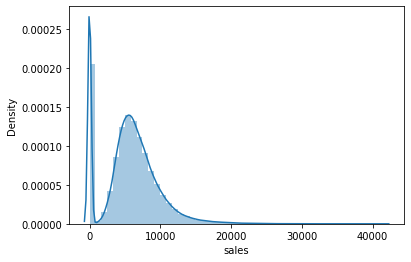

In [36]:
sns.distplot( df1['sales'] )
#plt.rcParams['figure.figsize'] = (20, 10)

C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

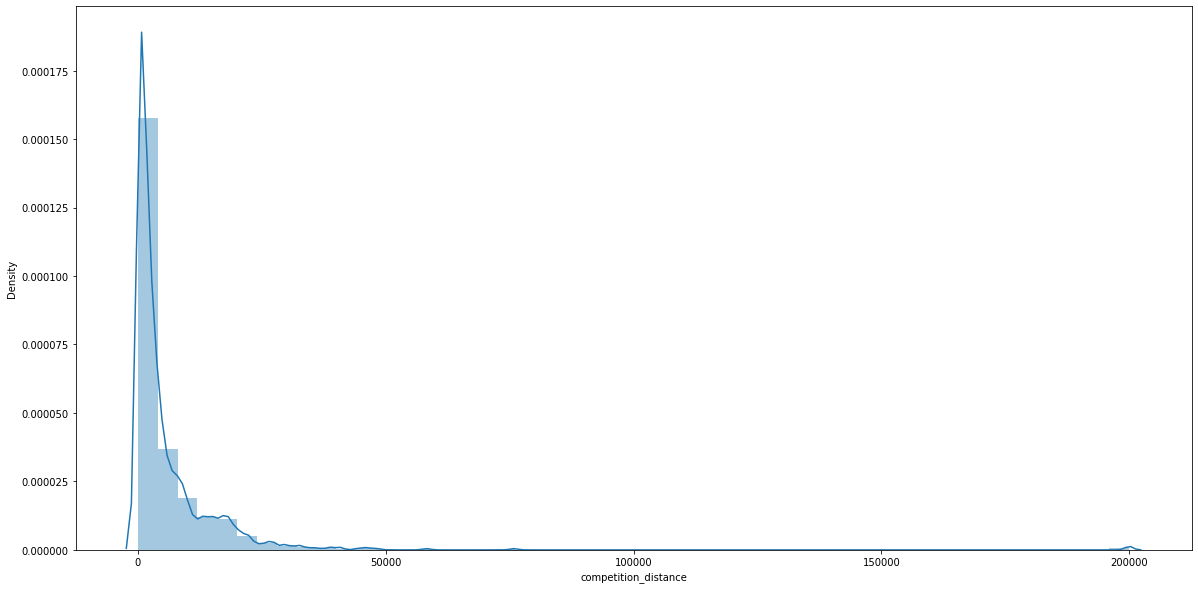

In [37]:
sns.distplot( df1['competition_distance'] )
#plt.rcParams['figure.size']=(20,10)

# 1.7.2 Categorical Attributes:

In [38]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

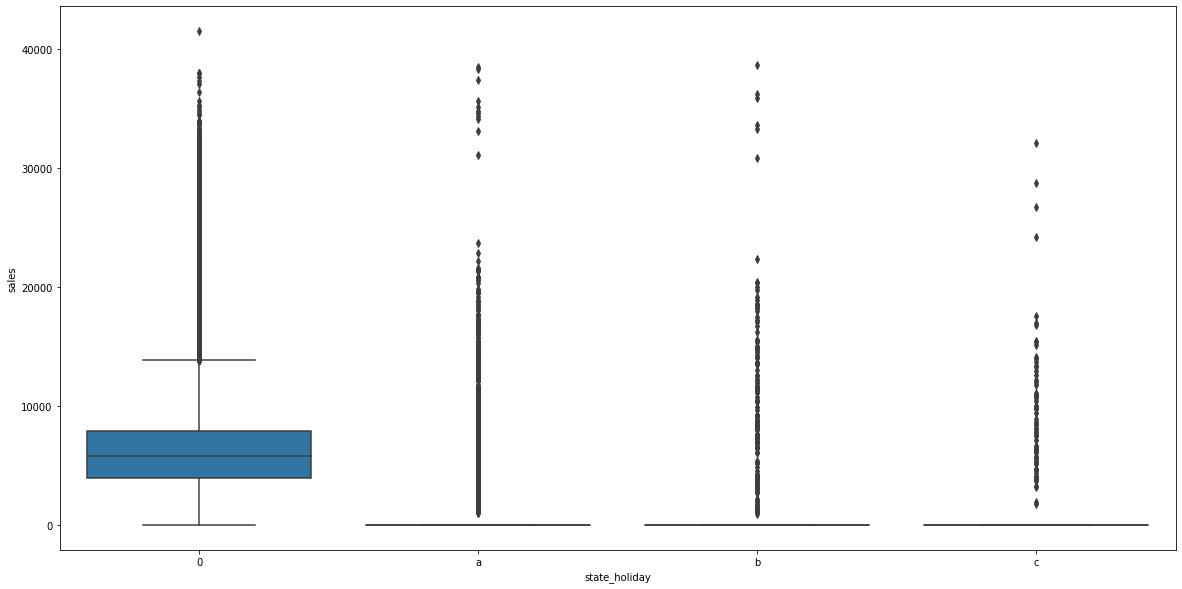

In [39]:
# state_holiday => 4

sns.boxplot( x ='state_holiday' , y ='sales', data = df1)

<AxesSubplot:xlabel='store_type', ylabel='sales'>

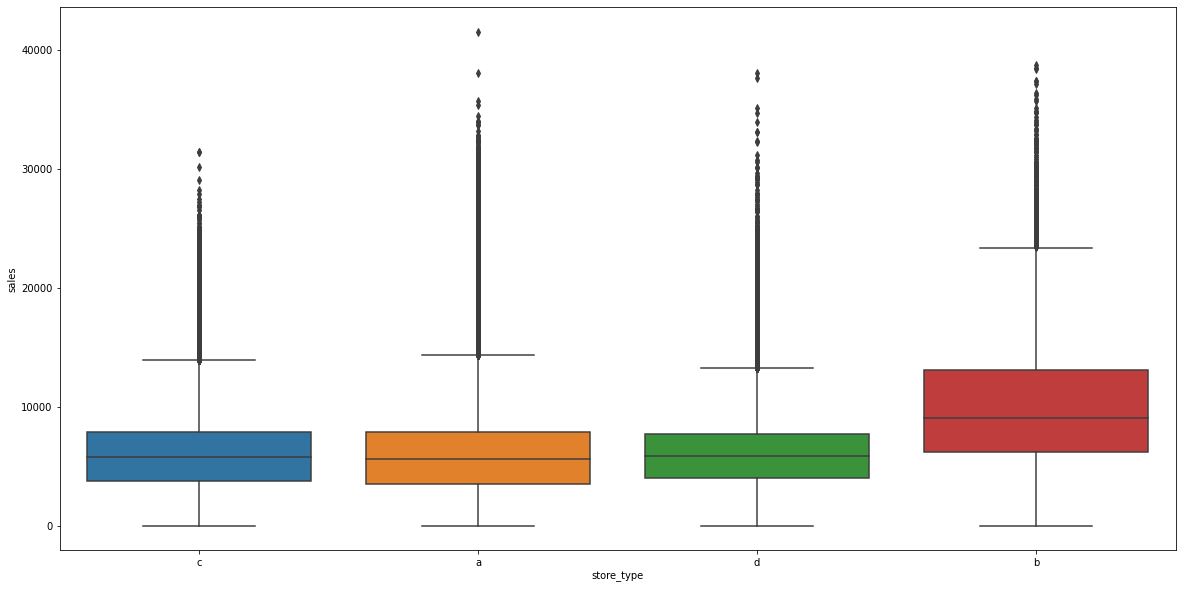

In [41]:
# store_type => 4

sns.boxplot( x='store_type', y='sales', data=df1)
#plt.rcParams["figure.size"]=(20,10)

<AxesSubplot:xlabel='assortment', ylabel='sales'>

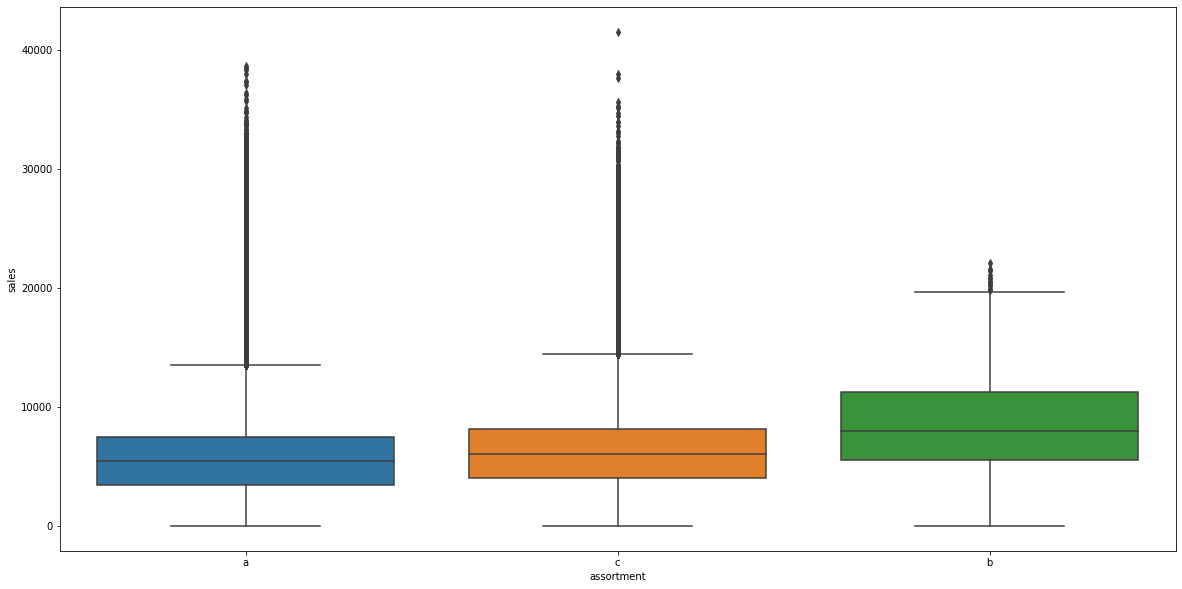

In [42]:
# assortment => 3

sns.boxplot( x='assortment', y='sales', data=df1)
#plt.rcParams["figure.size"]=(20,10)

<AxesSubplot:xlabel='promo_interval', ylabel='sales'>

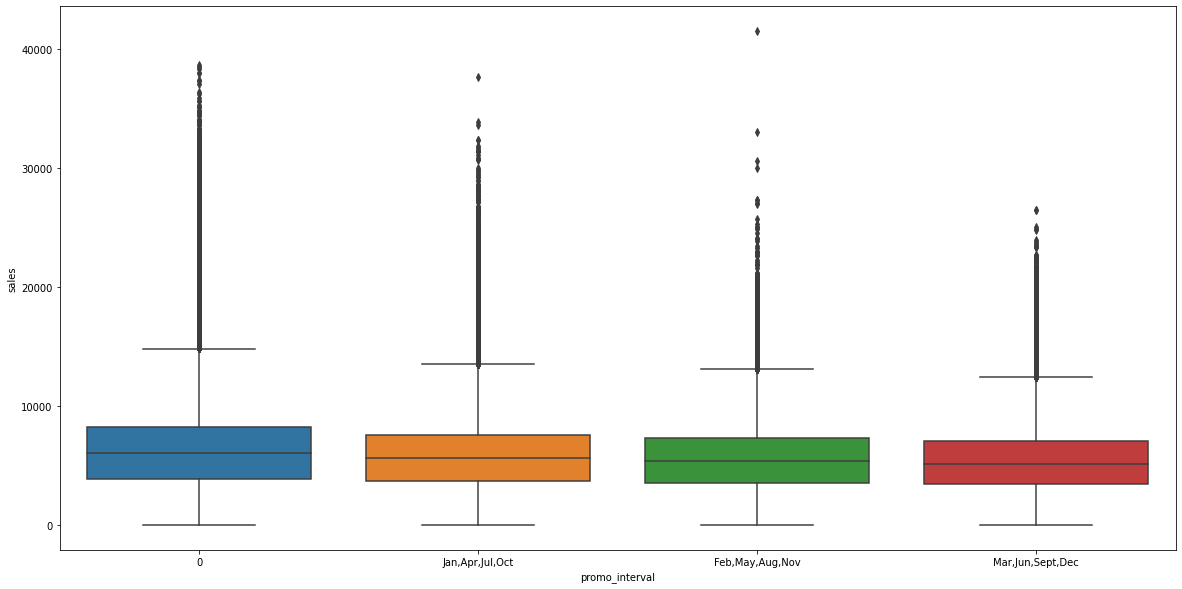

In [43]:
# promo_interval => 4

sns.boxplot(x='promo_interval', y='sales', data=df1)
#plt.rcParams["figure.size"]=(20,10)

<AxesSubplot:xlabel='month_map', ylabel='sales'>

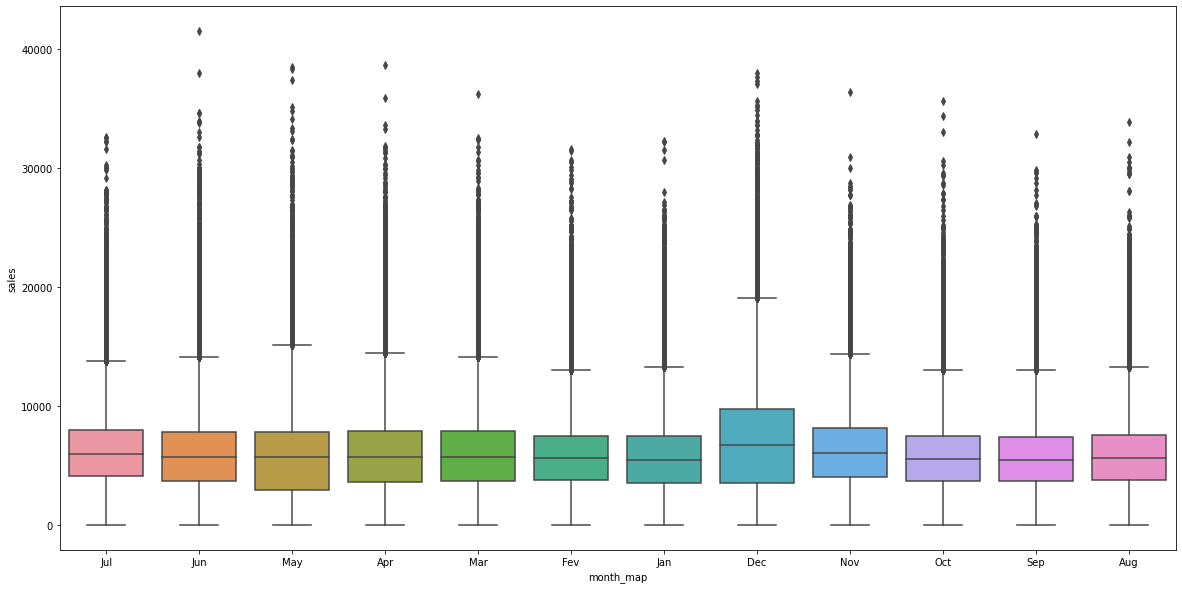

In [44]:
# month_map =>  12

sns.boxplot(x='month_map', y='sales', data=df1)
#plt.rcParams["figure.size"]=(20,10)

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

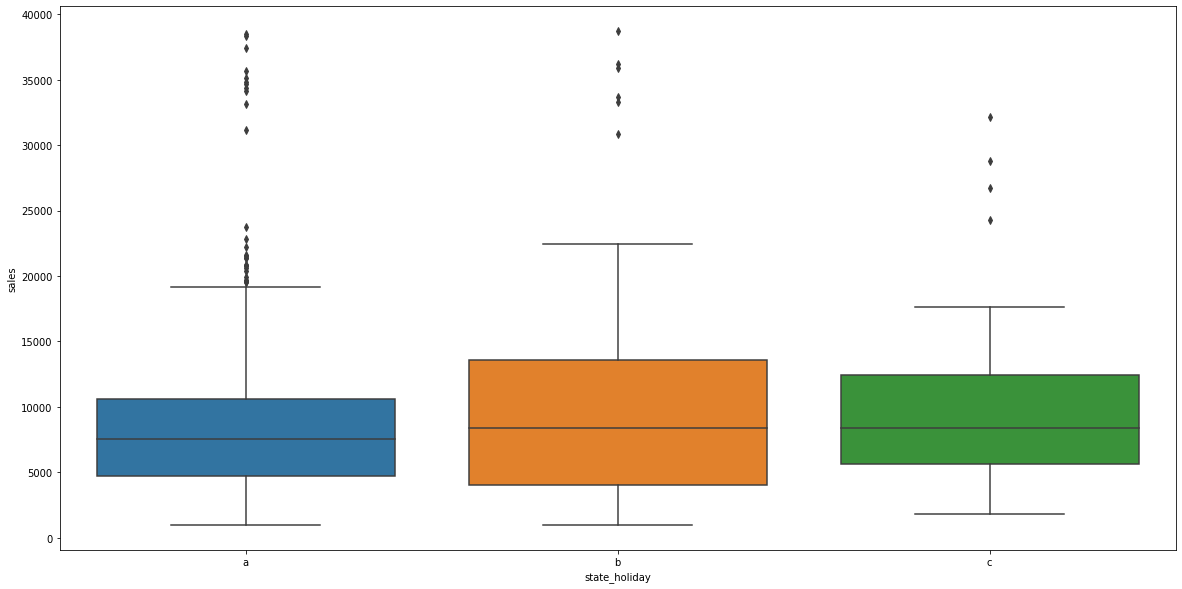

In [45]:
aux1 = df1[( df1['state_holiday' ] != '0' ) & (df1[ 'sales' ] > 0 ) ]

sns.boxplot( x = 'state_holiday', y = 'sales', data = aux1 )
#plt.rcParams["figure.size"]=(20,10)

<AxesSubplot:xlabel='store_type', ylabel='sales'>

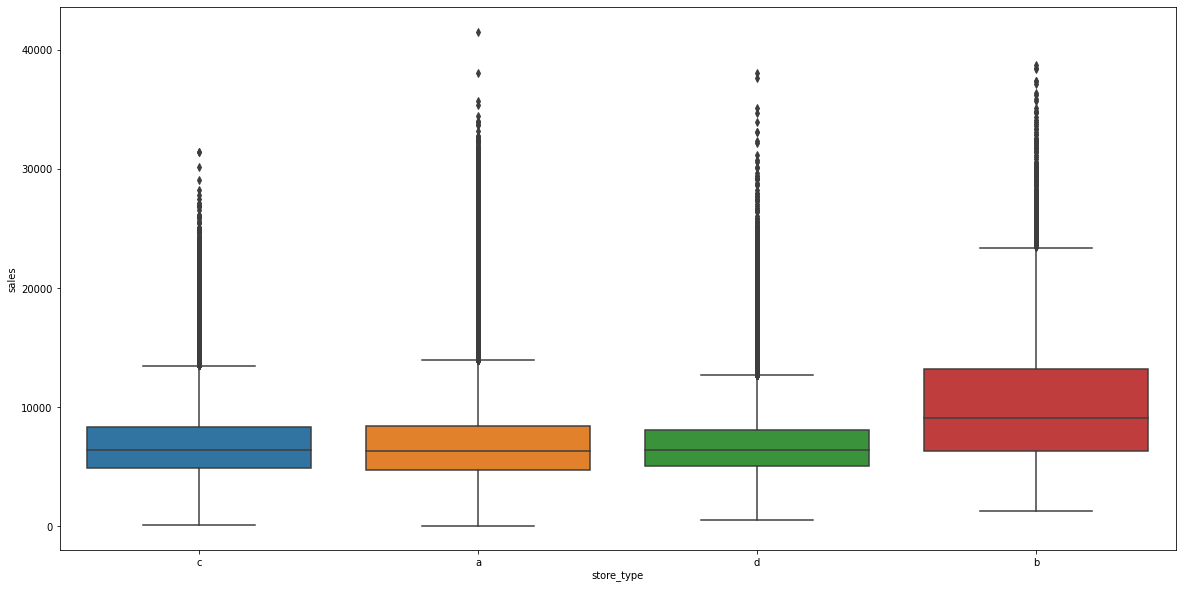

In [46]:
aux1 = df1[( df1[ 'store_type' ] != '0' ) & (df1[ 'sales' ] > 0 ) ]

sns.boxplot( x = 'store_type', y = 'sales', data = aux1 )
#plt.rcParams["figure.size"]=(20,10)

<AxesSubplot:xlabel='assortment', ylabel='sales'>

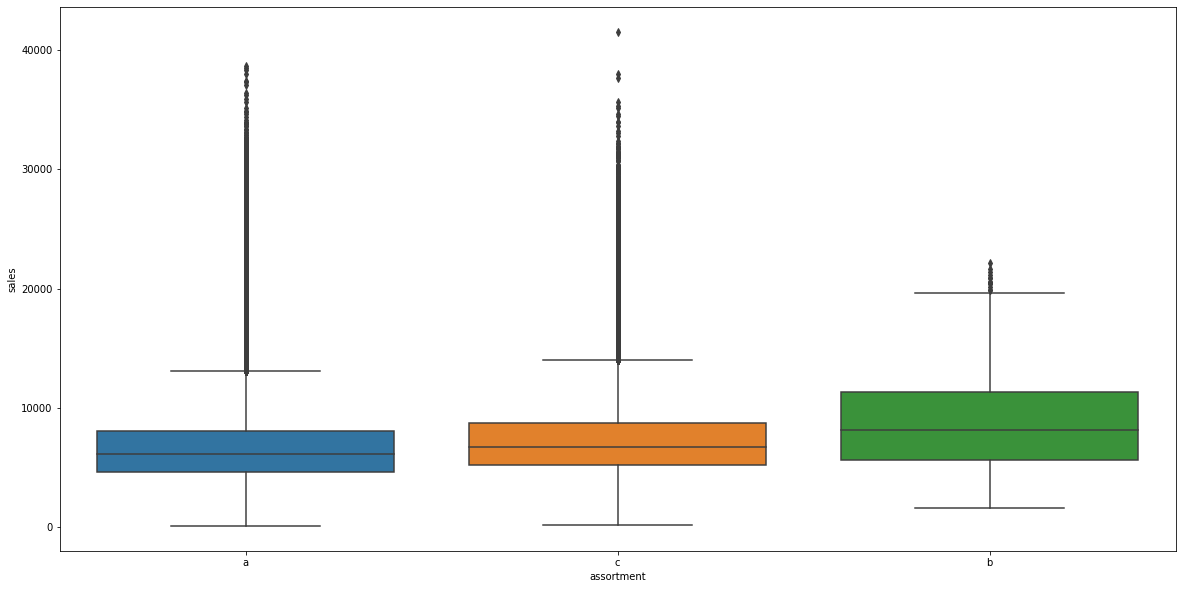

In [47]:
aux1 = df1[( df1[ 'assortment' ] != '0' ) & (df1[ 'sales' ] > 0 ) ]

sns.boxplot( x = 'assortment', y = 'sales', data = aux1 )
#plt.rcParams["figure.size"]=(20,10)

<AxesSubplot:xlabel='assortment', ylabel='sales'>

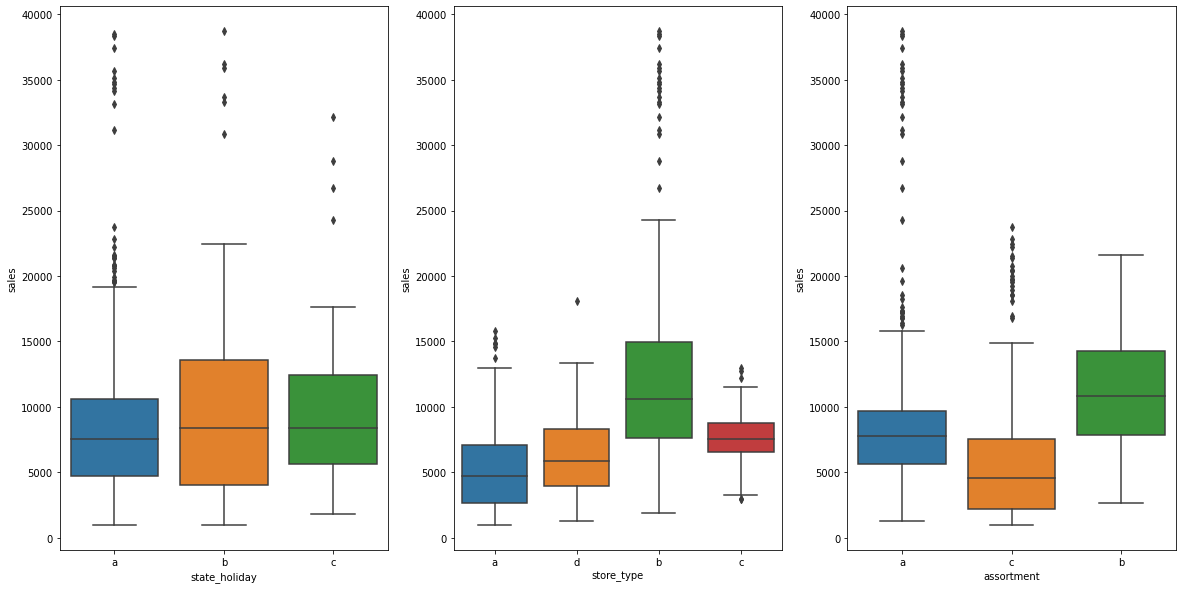

In [48]:
aux1 = df1[ ( df1['state_holiday'] !='0' ) & ( df1['sales'] > 0 ) ]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux1 )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux1 )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux1 )
#plt.rcParams["figure.size"]=(20,10)

# 2.0 FEATURE ENGINEERING:

In [49]:
df2 = df1.copy()

# 2.1 Mapa mental de hipóteses:

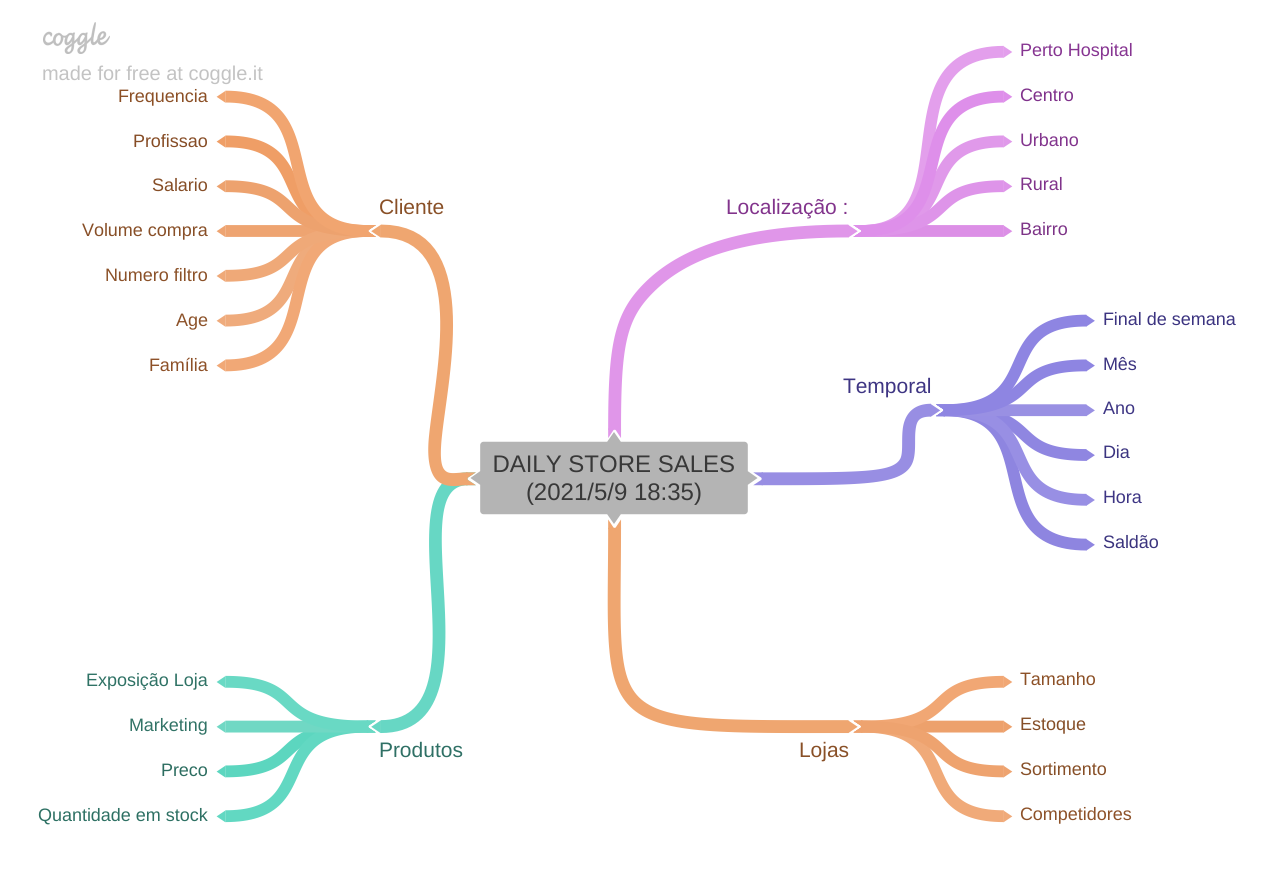

In [50]:
Image ( 'daily_store_map_image.png' )

# 2.2 Criação de hipóteses:

# 2.3 Lista final de hipóteses:

### 1) Lojas com maior sortimentos deveriam vender mais.
### 2) Lojas com competidores mais próximos deveriam vender menos.
### 3) Lojas com competidores à mais tempo deveriam vender mais.
### 4) Lojas com promoções ativas por amis tempo deveriam vender mais.
### 5) Lojas com mais dias de promoção deveriam vender mais.
### 6) Lojas com mais promoções consecutivas deveriam vender mais.
### 7) Lojas abertas durante o feriado de Natal deveriam vender mais.
### 8) Lojas deveriam vender mais ao longo dos anos.
### 9) Lojas deveriam vender mais no segundo semestre do ano.
### 10) Lojas deveriam vender mais depoois do dia 10 de cada mês.
### 11) Lojas deveriam ver menos aos finais de semana.
### 12) Lojas deveriam vender menos durante os feriados escolares.













In [51]:
# year:
df2['year'] = df2['date'].dt.year

# month:
df2['month'] = df2['date'].dt.month

# week of year:
df2['week_of_year'] = df2['date'].dt.weekofyear

# day
df2['day'] = df2['date'].dt.day

# year week:
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

# competition since:
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year= x['competition_open_since_year'], month= x['competition_open_since_month'], day= 1 ), axis= 1 )

df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

# promo since:
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )

df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )

df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

# assortment:
# a = basic, b = extra, c = extendend

df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x =='b' else 'extendend' )

# state holiday:
# a = public holiday, b = Easter holiday, c = Christmas 

df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )


<ipython-input-51-0c83ee3cec32>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [52]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 FILTRAGEM DE DADOS:

In [53]:
df3 = df2.copy()

In [54]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,week_of_year,day,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


# 3.1 Filtragem de linhas:

In [55]:
df3 = df3[( df3['open'] != 0 ) & ( df3['sales'] > 0 )]

# 3.2 Seleção das colunas:

In [56]:
cols_drop = ['customers', 'open','promo_interval','month_map']
df3 = df3.drop( cols_drop, axis=1 )

In [57]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'week_of_year', 'day', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0 ANALISE EXPLORATORIA DE DADOS:

In [58]:
df4 = df3.copy()

In [59]:
df4

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,week_of_year,day,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extendend,620.0,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,public_holiday,1,b,basic,150.0,...,0,2013,1,1,1,2013-00,2006-09-01,77,2012-12-31,0
1016827,733,2,2013-01-01,10765,0,public_holiday,1,b,extra,860.0,...,0,2013,1,1,1,2013-00,1999-10-01,161,2012-12-31,0
1016863,769,2,2013-01-01,5035,0,public_holiday,1,b,extra,840.0,...,1,2013,1,1,1,2013-00,2013-01-01,0,2012-11-19,6
1017042,948,2,2013-01-01,4491,0,public_holiday,1,b,extra,1430.0,...,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0


# 4.1 Analise Univariada:

### 4.1.1. Response Variable:

C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

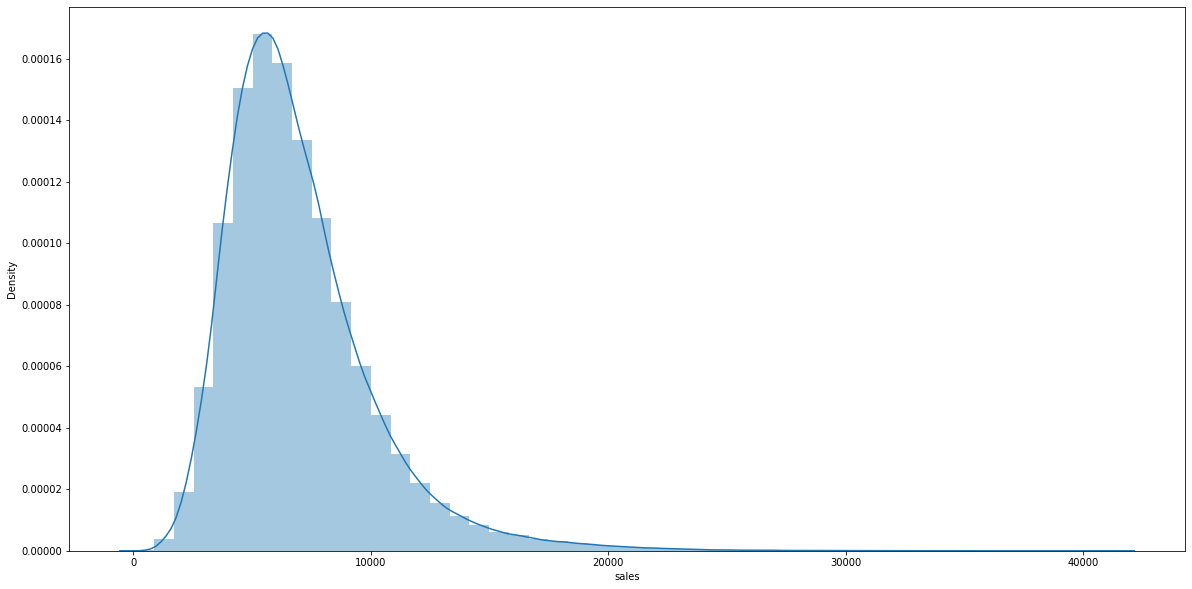

In [61]:
sns.distplot( df4['sales'], kde = True )
#plt.rcParams["figure.size"]=(20,10)

### 4.1.2. Numerical Variable:

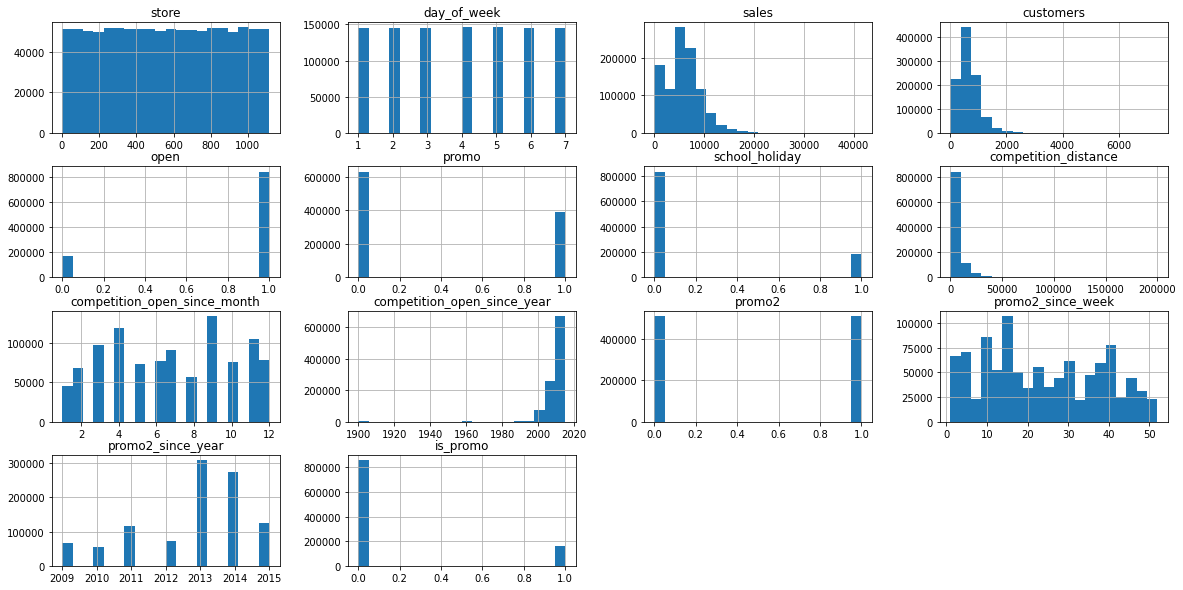

In [62]:
num_attributes.hist(bins=20);
#plt.rcParams["figure.size"]=(10,10)


### 4.1.3. Categorical Variable:

In [63]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

ValueError: num must be 1 <= num <= 4, not 6

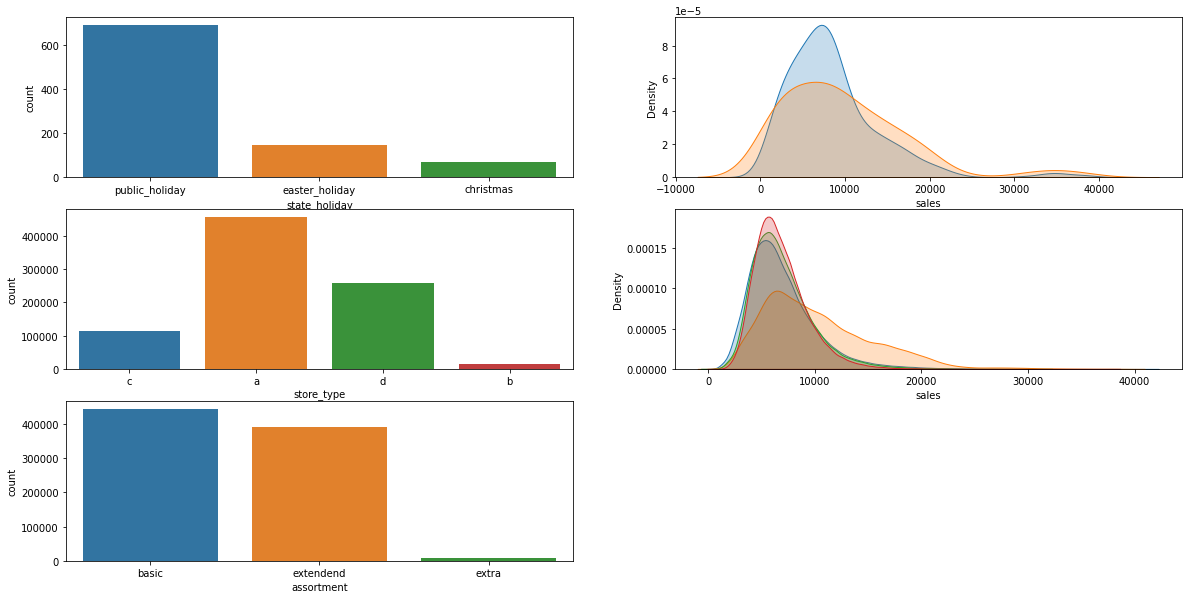

In [137]:
df4['state_holiday'].drop_duplicates()

# state holiday:

plt.subplot( 3, 2, 1 )
a = df4[ df4['state_holiday'] != 'regular_day' ]
sns.countplot( a['state_holiday'] )

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[ df4['state_holiday'] == 'public_holiday']   ['sales'], label='public_holiday',    shade=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'easter_holiday']   ['sales'], label='easter_holiday',    shade=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'chrstimas_holiday']['sales'], label='chrstimas_holiday', shade=True )


# story type:

plt.subplot( 3, 2, 3 )
sns.countplot( df4['store_type'])

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[ df4['store_type'] == 'a']['sales'], label='a', shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'c']['sales'], label='c', shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'd']['sales'], label='d', shade=True )


# assortment:

plt.subplot( 3, 2, 5 )
sns.countplot( df4['assortment'])

plt.subplot( 2, 2, 6 )
sns.kdeplot( df4[ df4['assortment'] == 'a']['sales'], label='extended', shade=True )
sns.kdeplot( df4[ df4['assortment'] == 'b']['sales'], label='basic',    shade=True )
sns.kdeplot( df4[ df4['assortment'] == 'c']['sales'], label='extra',    shade=True )
#plt.rcParams["figure.size"]=(1,5)



# 4.2 Analise Bivariada:

### H1. Lojas com maior sortimentos deveriam vender mais:
**FALSA** Lojas com MAIOR SORTMENTO vendem MENOS.

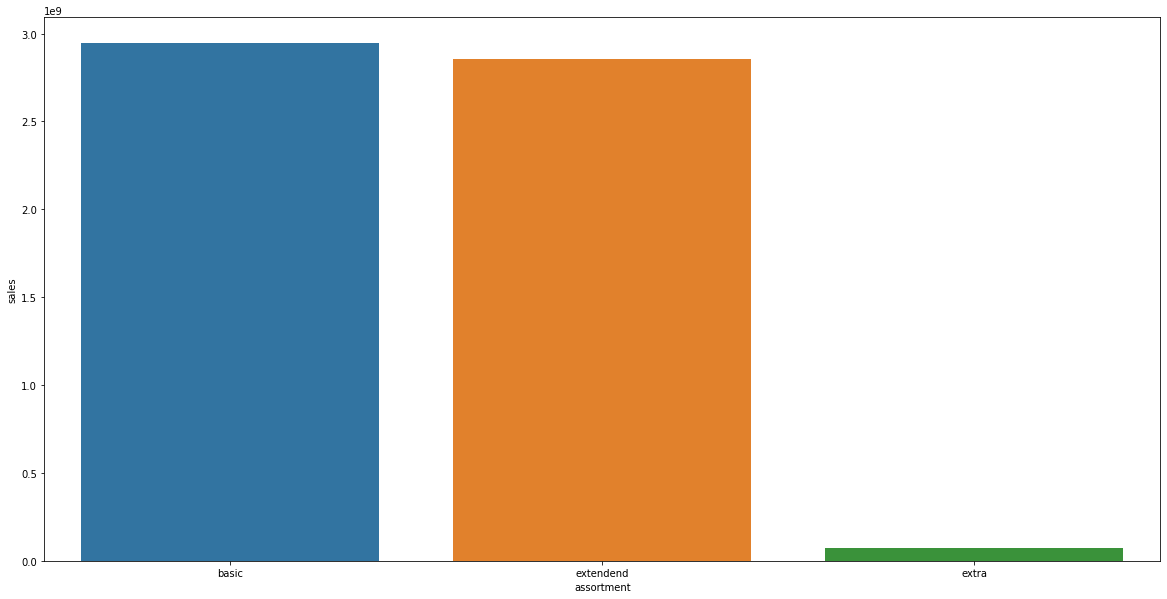

In [65]:
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x = 'assortment', y='sales', data = aux1 );

<AxesSubplot:xlabel='year_week'>

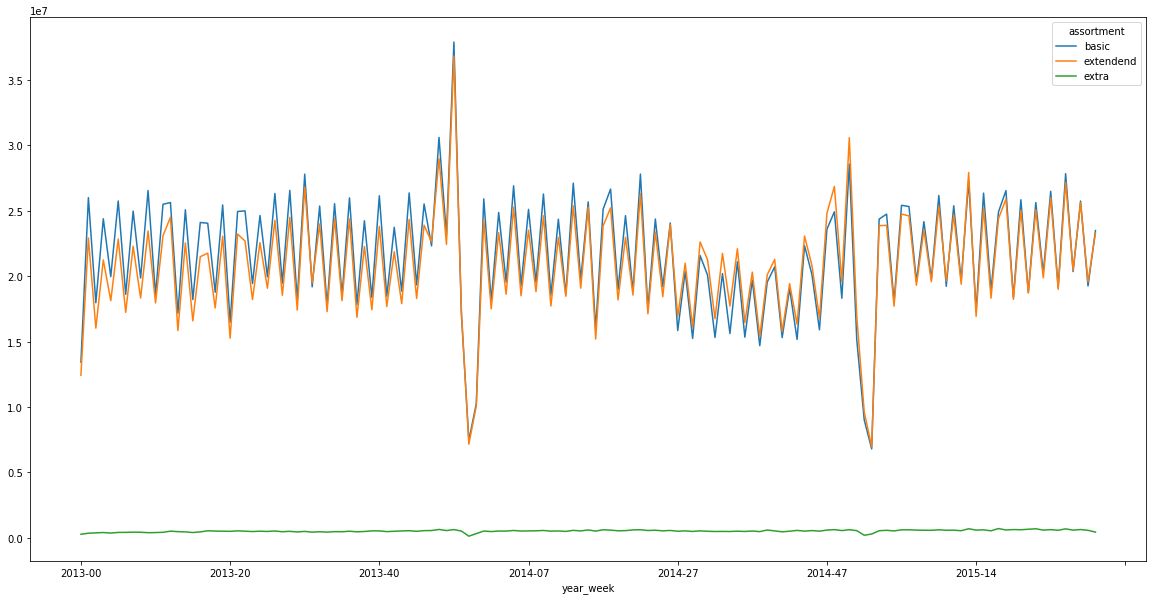

In [66]:
aux2 = df4[['assortment', 'sales', 'year_week']].groupby( [ 'year_week', 'assortment' ] ).sum().reset_index()
aux2.pivot( index = 'year_week', columns ='assortment', values ='sales' ).plot()

<AxesSubplot:xlabel='year_week'>

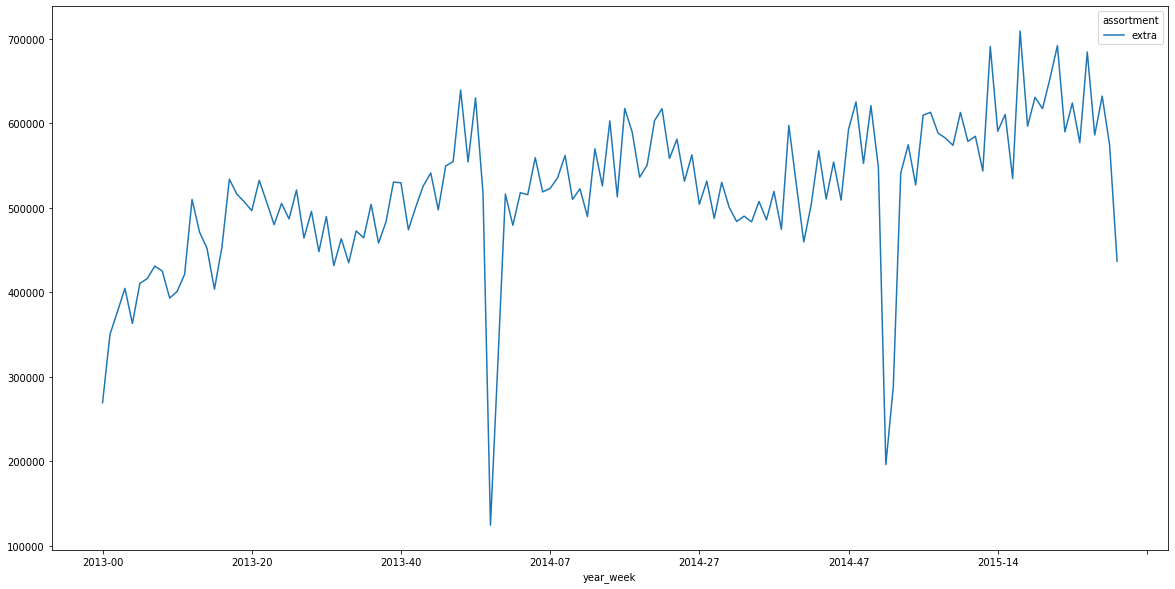

In [67]:
aux3 =  aux2[ aux2['assortment'] == 'extra' ]
aux3.pivot( index = 'year_week', columns ='assortment', values = 'sales' ).plot()

### H2. Lojas com competidores mais próximos deveriam vender menos.
**FALSA** Lojas com COMPETIDORES MAIS PRÓXIMOS vendem MAIS.

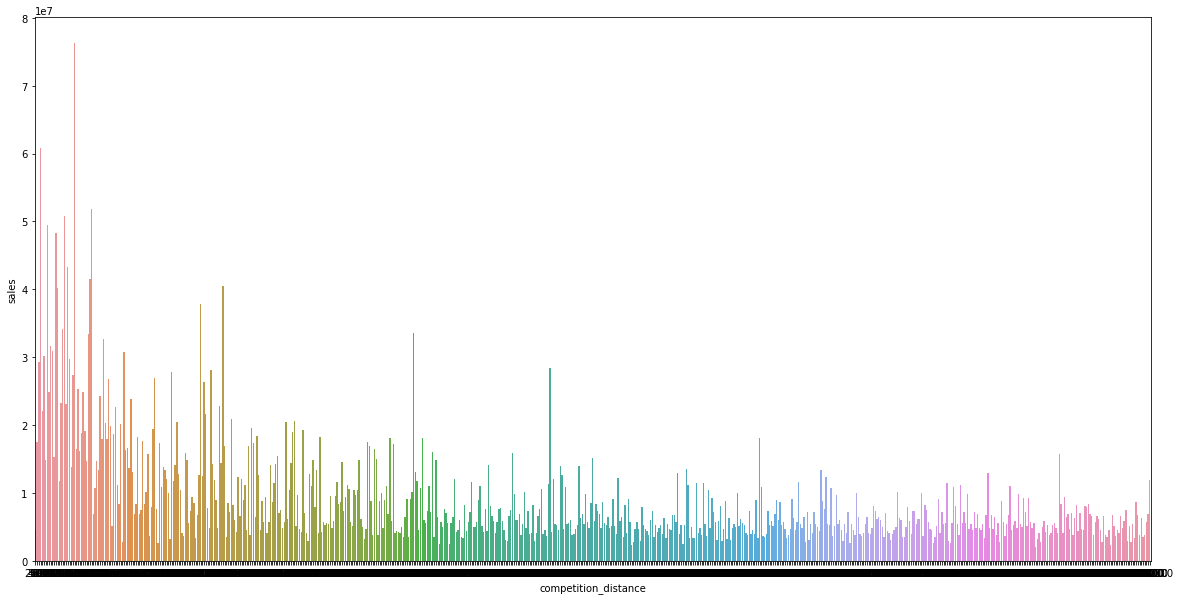

In [68]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
sns.barplot( x = 'competition_distance', y = 'sales', data = aux1 );

In [69]:
aux1.sample(4)

,competition_distance,sales
347,5030.0,4080447
260,3270.0,8997660
473,9640.0,4619798
469,9430.0,5080588


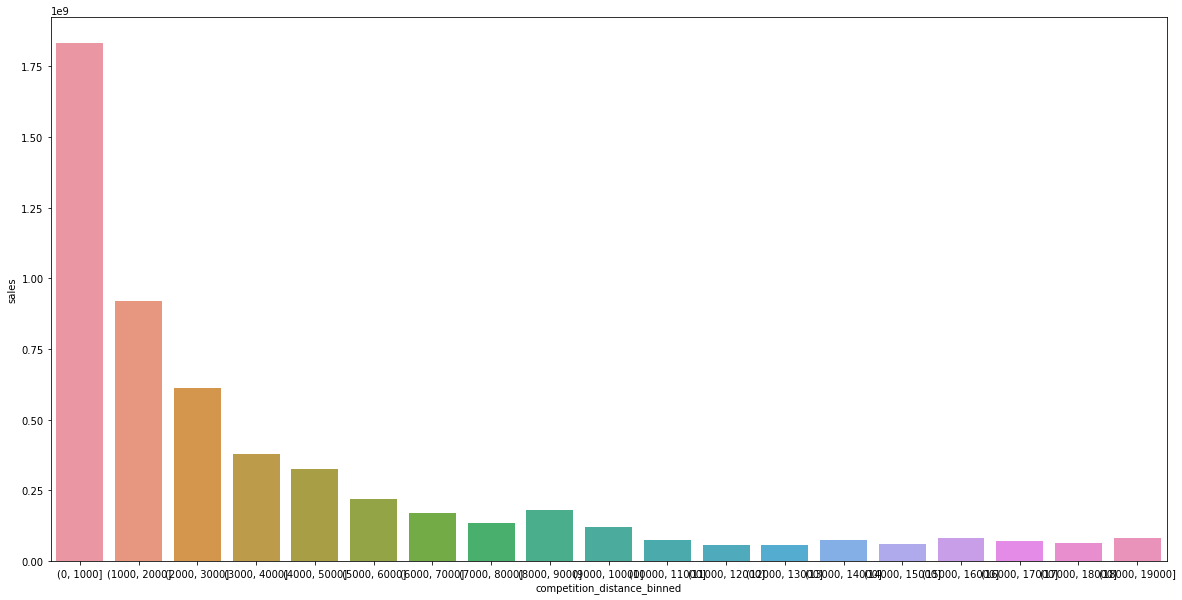

In [70]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

bins = list( np.arange(0, 20000, 1000) )

aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned' ).sum().reset_index()

sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );

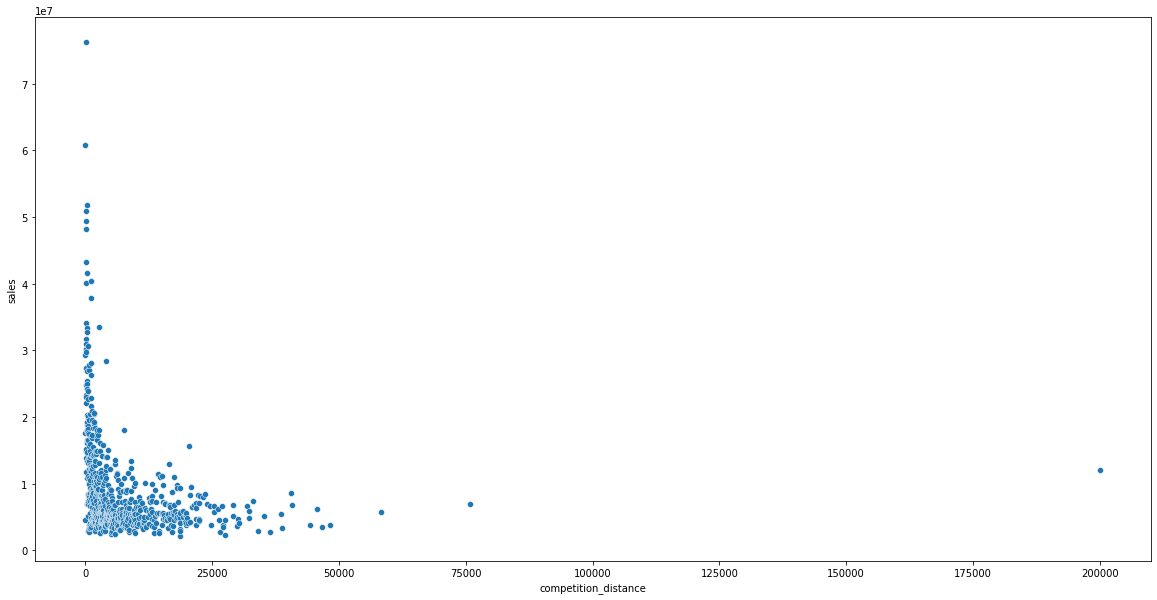

In [71]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

sns.scatterplot( x ='competition_distance', y='sales', data=aux1 );

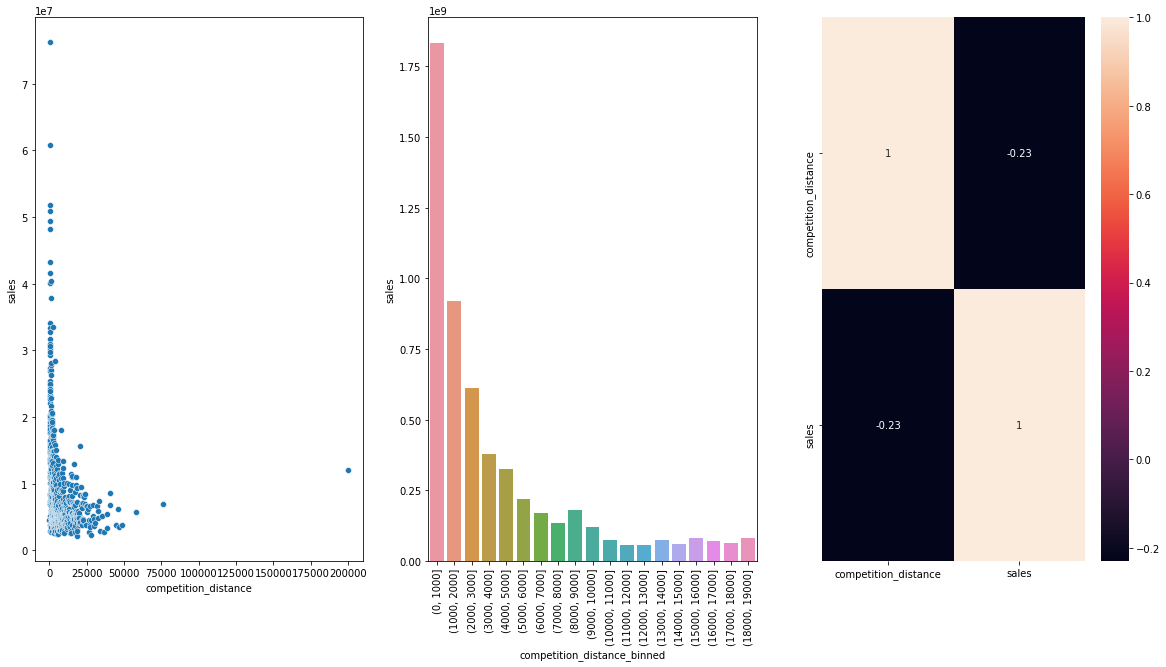

In [72]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

plt.subplot( 1, 3, 1)
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 )

plt.subplot( 1, 3, 2)
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 )
bins = list( np.arange(0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned' ).sum().reset_index()
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );




### H3. Lojas com competidores á mais tempo deveriam vender  mais.
**FALSA** Lojas com COMPETIDORES A MAIS TEMPO vendem MENOS.

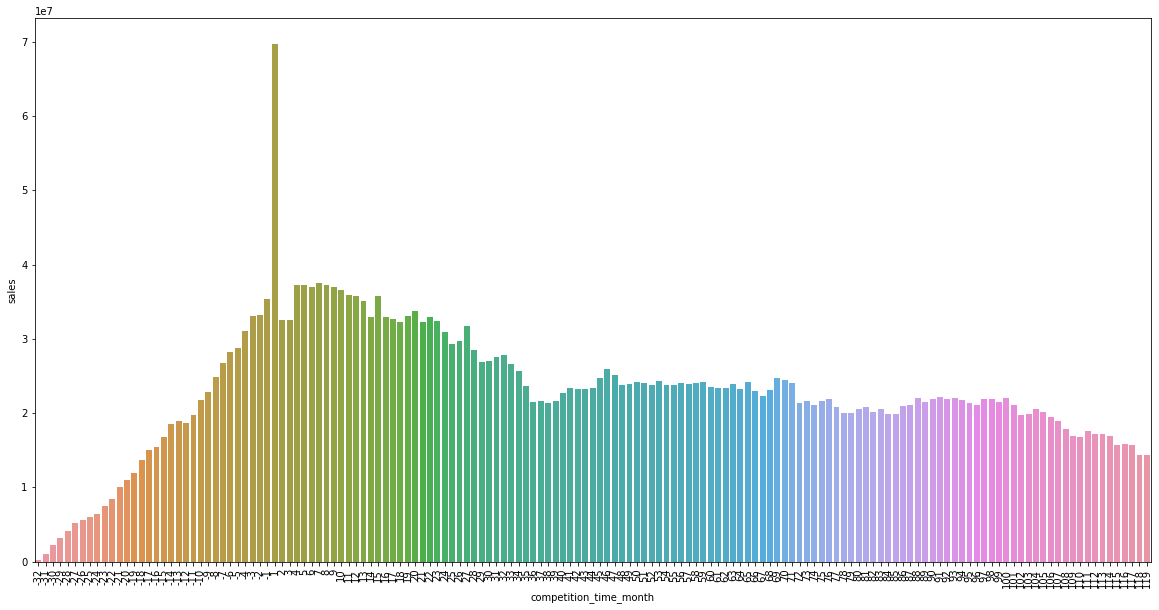

In [73]:
aux1 = df4[['competition_time_month', 'sales']].groupby( 'competition_time_month' ).sum().reset_index()
aux2 = aux1[( aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 )]

sns.barplot( x='competition_time_month', y='sales', data=aux2 );
plt.xticks( rotation=90);

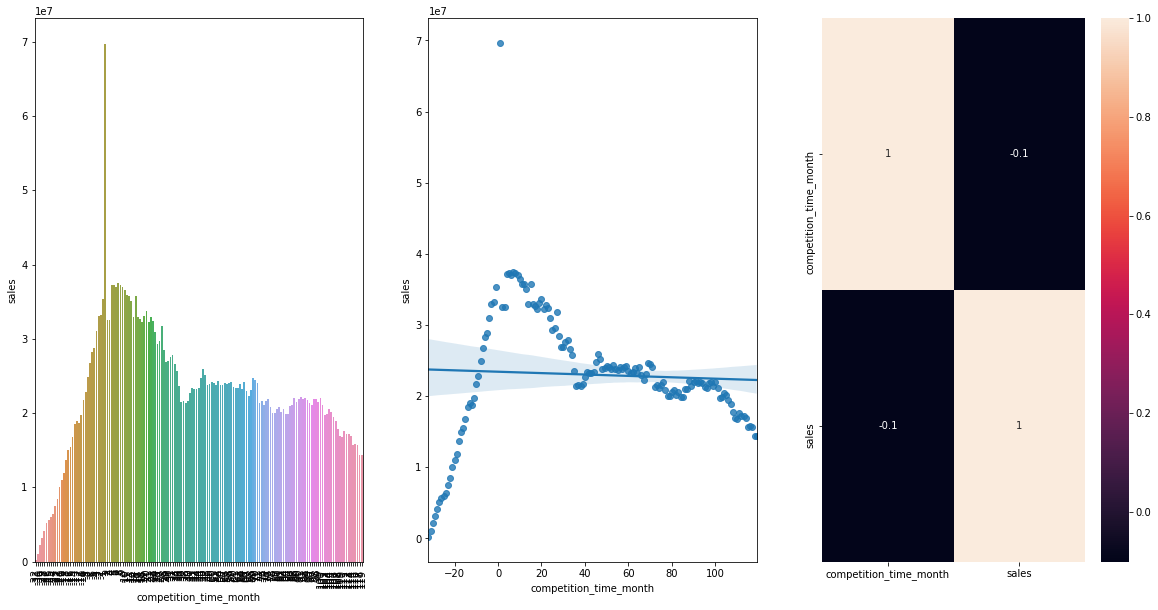

In [74]:
plt.subplot( 1, 3, 1 )
aux1 = df4[['competition_time_month', 'sales']].groupby( 'competition_time_month' ).sum().reset_index()
aux2 = aux1[( aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 )]

sns.barplot( x='competition_time_month', y='sales', data=aux2 );
plt.xticks( rotation=90);

plt.subplot( 1, 3, 2 )
sns.regplot( x='competition_time_month', y='sales', data=aux2 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson'), annot=True );

### H4. Lojas com promoções ativas por mais tempo deveriam vender mais.
**FALSA** Lojas com promoçoes ativas por mais tempo vendem menos, depois de um certo período.

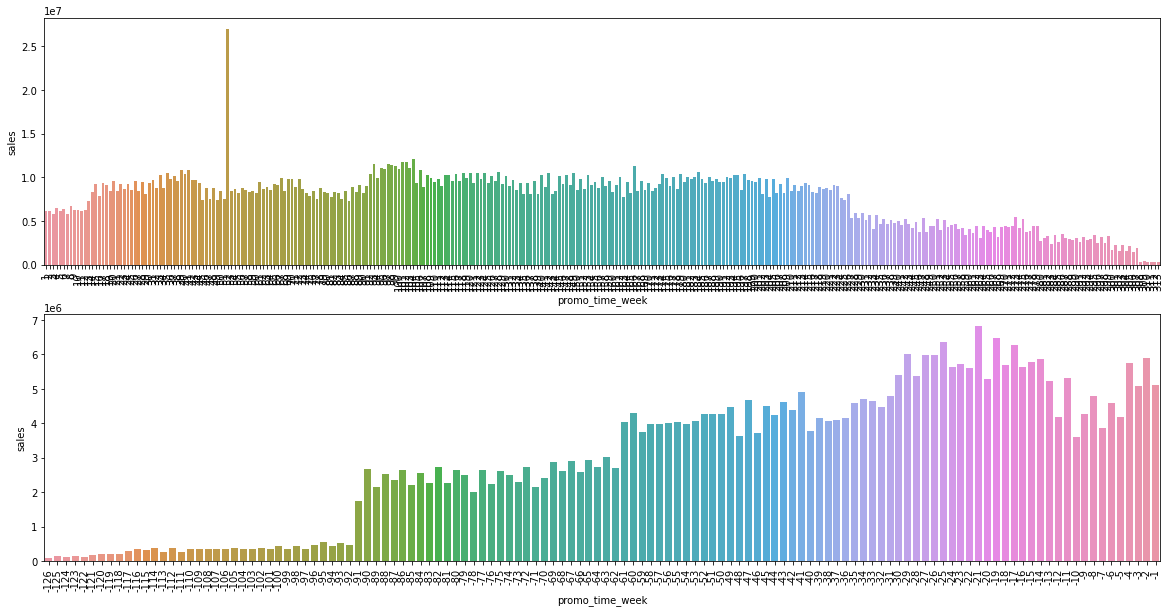

In [75]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

sns.barplot( x='promo_time_week', y='sales', data=aux1 );

plt.subplot(2, 1, 1)
aux2 = aux1[aux1['promo_time_week'] > 0 ] # promo extendido
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot(2, 1, 2)
aux3 = aux1[aux1['promo_time_week'] < 0 ] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3 );
plt.xticks( rotation=90 );

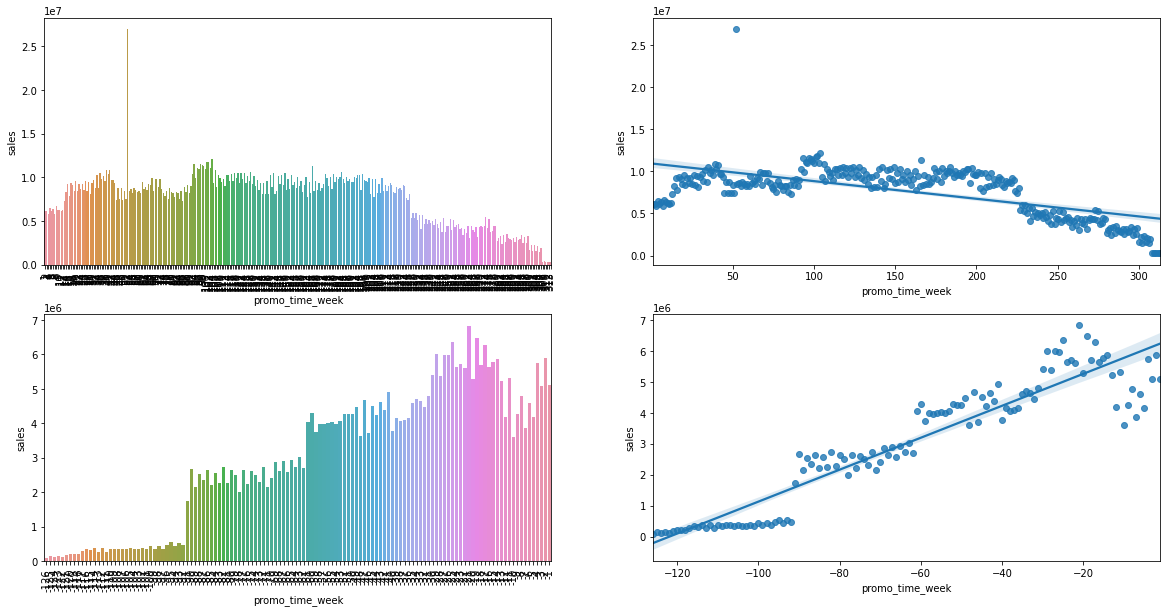

In [76]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

sns.barplot( x='promo_time_week', y='sales', data=aux1 );

plt.subplot( 2, 2, 1)
aux2 = aux1[aux1['promo_time_week'] > 0 ] # promo extendido
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 2, 2, 2 )
sns.regplot(x='promo_time_week', y='sales', data=aux2);

plt.subplot(2, 2, 3 )
aux3 = aux1[aux1['promo_time_week'] < 0 ] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3 );
plt.xticks( rotation=90 );

plt.subplot( 2, 2, 4 )
sns.regplot( x='promo_time_week', y='sales', data=aux3 );

In [77]:
import matplotlib.gridspec as gridspec

In [78]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

grid = gridSpec(2,3)

plt.subplot(grid[0,0] )
aux2 = aux1[aux1['promo_time_week'] > 0 ] # promo extendido
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( grid[0,1] )
sns.regplot(x='promo_time_week', y='sales', data=aux2);

plt.subplot( grid[1,0] )
aux3 = aux1[aux1['promo_time_week'] < 0 ] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3 );
plt.xticks( rotation=90 );

plt.subplot(grid[1,1] )
sns.regplot(x='promo_time_week', y='sales', data=aux3)

plt.subplot( grid[:,2] )
sns.heatmap( aux1.corr(method='person' ), annot=True );

TypeError: 'module' object is not callable

### H6 Lojas com mais promoções consecutivas deveriam vender mais.
**FALSA Lojas com promoções consecutivas vendem menos.**

In [79]:
df4[['promo', 'promo2', 'sales']].groupby(['promo', 'promo2']).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


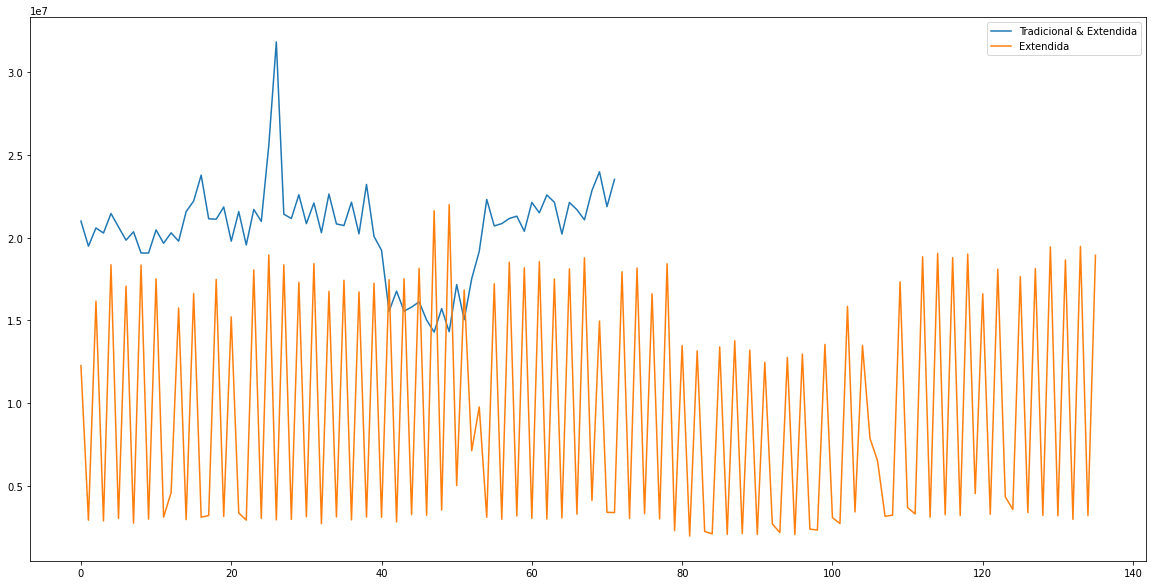

In [80]:
aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[( df4['promo'] == 0 ) & ( df4['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax = ax)
ax.legend(labels=['Tradicional & Extendida', 'Extendida']);

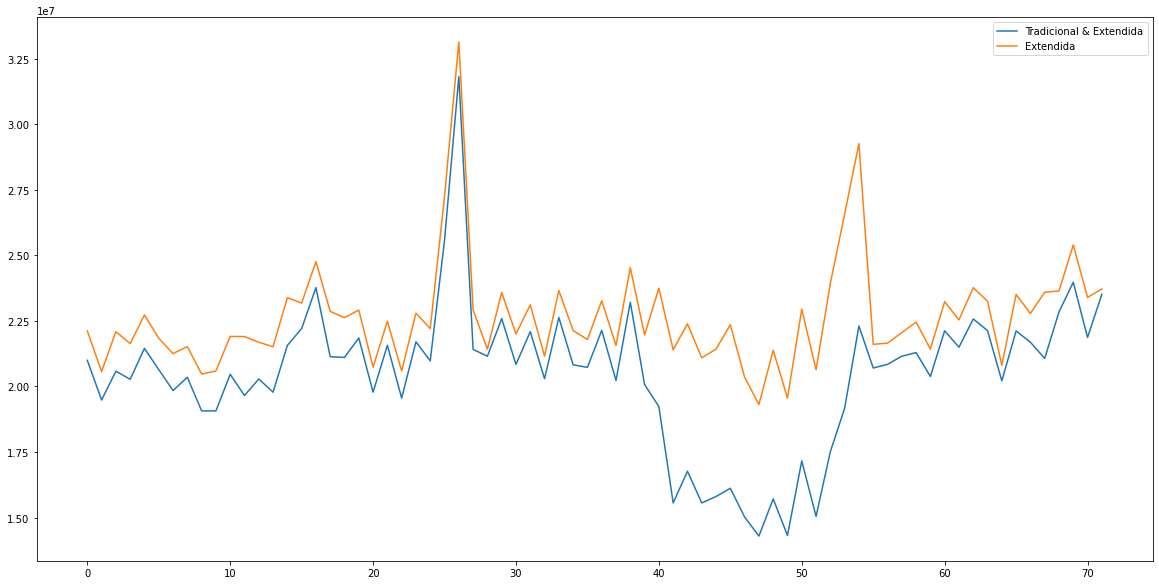

In [81]:
aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax = ax)
ax.legend( labels = ['Tradicional & Extendida', 'Extendida']);

### H7 Lojas abertas durante o feriado de Natal deveriam vender mais.
**FALSA Lojas abertas durante o feriado de Natal vendem menos.

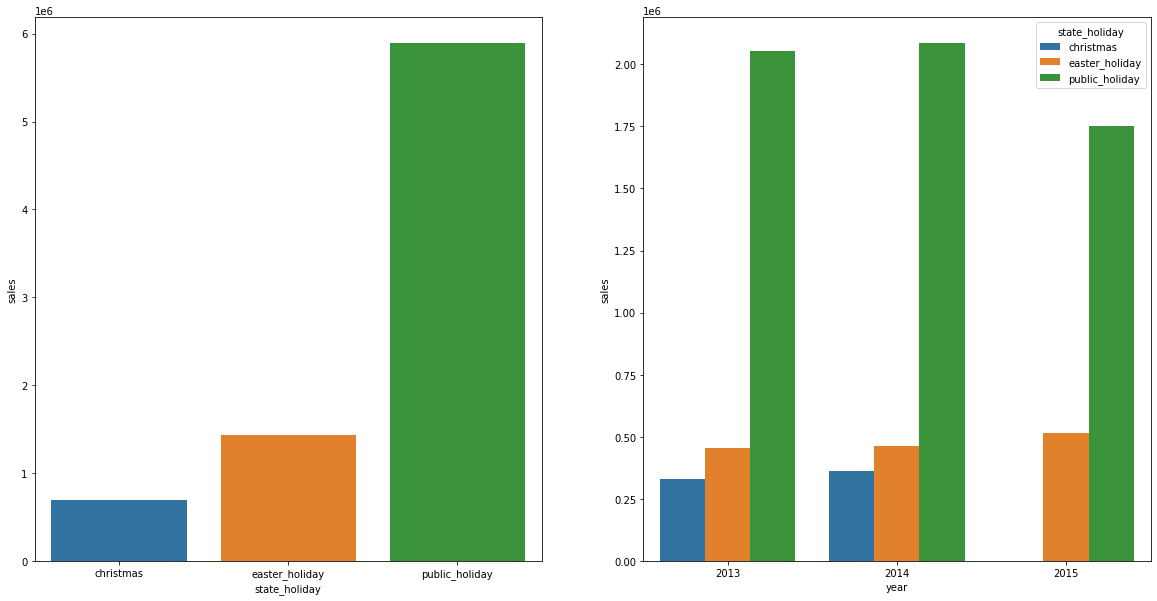

In [82]:
aux = df4[df4['state_holiday']!= 'regular_day']

plt.subplot( 1, 2, 1 )
aux1 = aux[['state_holiday', 'sales']].groupby( 'state_holiday' ).sum().reset_index()
sns.barplot( x='state_holiday', y='sales', data=aux1);

plt.subplot( 1, 2, 2 )
aux2 = aux[['year','state_holiday','sales']].groupby( ['year','state_holiday'] ).sum().reset_index()
sns.barplot( x='year', y='sales', hue='state_holiday',data=aux2);

### H8 Lojas deveriam vender mais ao longo dos anos.
**FALSALojas vendem menos ao longo dos anos.

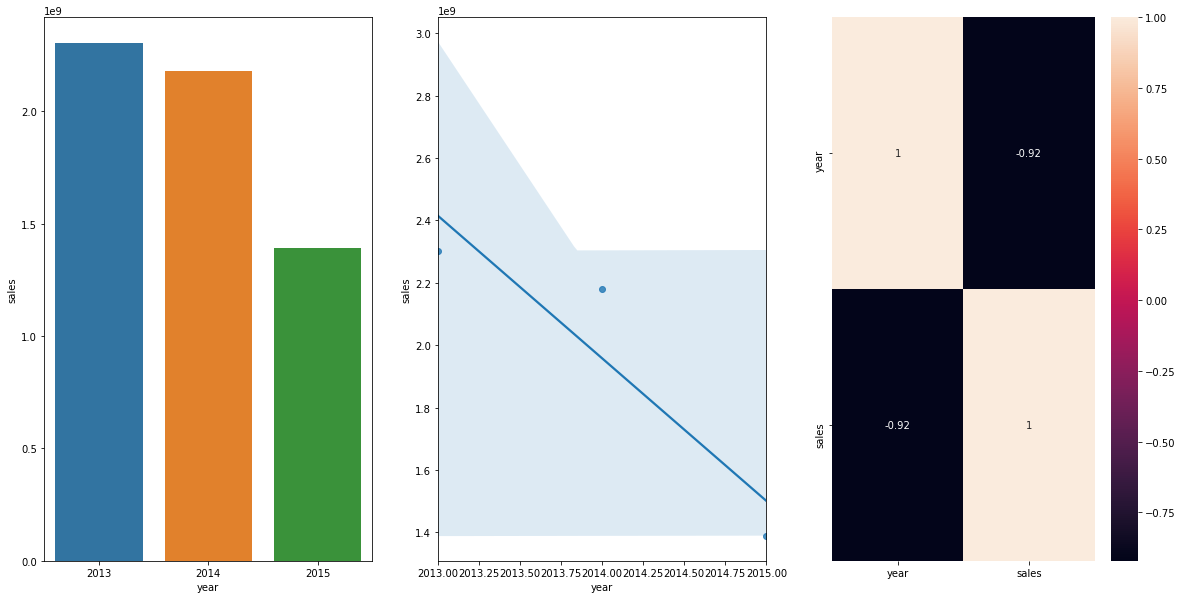

In [83]:
plt.subplot( 1, 3, 1)
aux1 = df4[['year', 'sales']].groupby('year').sum().reset_index()
sns.barplot( x='year', y='sales', data=aux1);

plt.subplot( 1, 3, 2)
sns.regplot(x='year', y='sales', data=aux1);

plt.subplot( 1, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True);

### H9 Lojas deveriam vender mais no segundo semestre do ano.
**FALSA Lojas vendem menos no segundo semestre.**

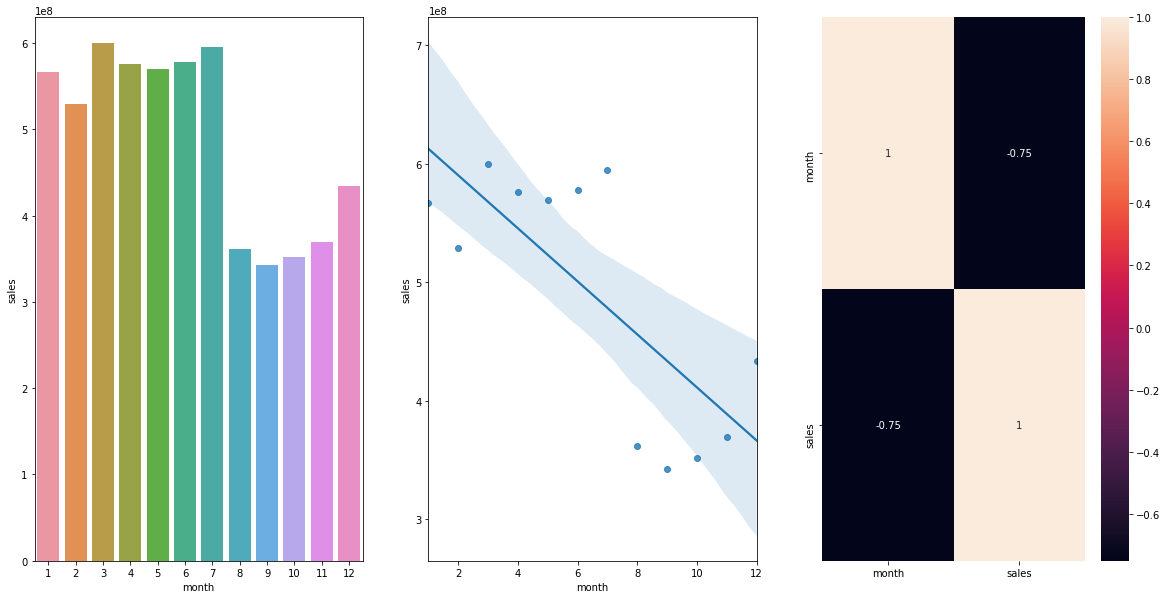

In [84]:
plt.subplot( 1, 3, 1 )
aux1 = df4[['month', 'sales']].groupby('month').sum().reset_index()
sns.barplot(x='month', y='sales', data=aux1);

plt.subplot( 1, 3, 2 )
sns.regplot(x='month', y='sales', data=aux1);

plt.subplot( 1, 3, 3 )
sns.heatmap(aux1.corr(method='pearson'), annot=True );

### H10 Lojas deveriam vender mais depois do dia 10 de cada mês.
**VERDADEIRA** Lojas vendem mais após 10 primeiros dias de cada mês.


<AxesSubplot:xlabel='before_after', ylabel='sales'>

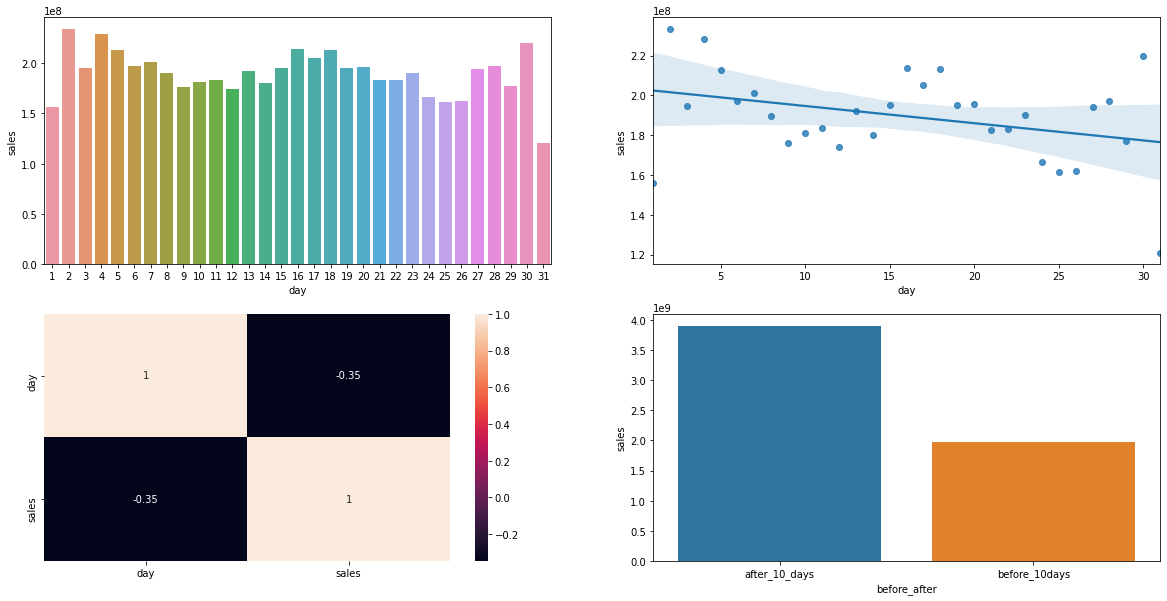

In [85]:
plt.subplot( 2, 2, 1 )
aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()
sns.barplot( x='day', y='sales', data= aux1 );

plt.subplot( 2, 2, 2 )
sns.regplot( x='day', y='sales', data= aux1 );

plt.subplot( 2, 2, 3 )
sns.heatmap( aux1.corr(method ='pearson'), annot=True )

plt.subplot( 2, 2, 4 )
aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10days' if x<= 10 else 'after_10_days' )
aux2 = aux1[['before_after', 'sales']].groupby( 'before_after' ).sum().reset_index()
sns.barplot(x='before_after', y='sales', data=aux2)

### H11 Lojas deveriam ver menos aos finais de semana.
**VERDADEIRA Lojas vendem menos aos finais de semana.

<AxesSubplot:>

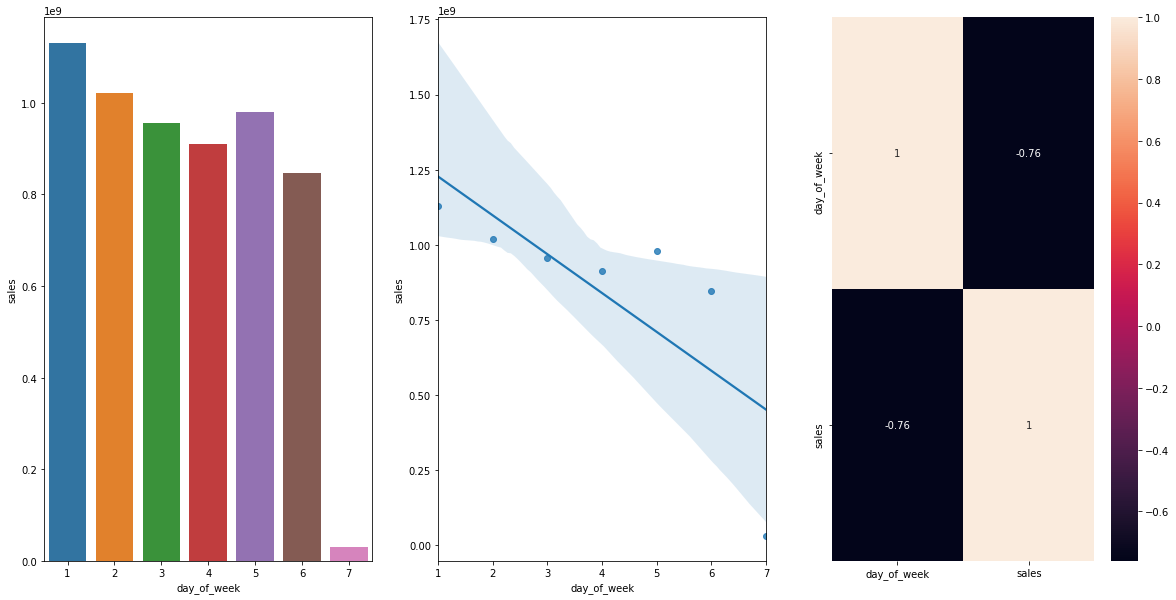

In [86]:
plt.subplot( 1, 3, 1 )
aux1 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()
sns.barplot( x='day_of_week', y='sales', data=aux1 )

plt.subplot( 1, 3, 2 )
sns.regplot( x='day_of_week', y='sales', data=aux1 )

plt.subplot( 1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True )

### H12 Lojas deveriam vender menos durante os feriados escolares.
**

<AxesSubplot:xlabel='month', ylabel='sales'>

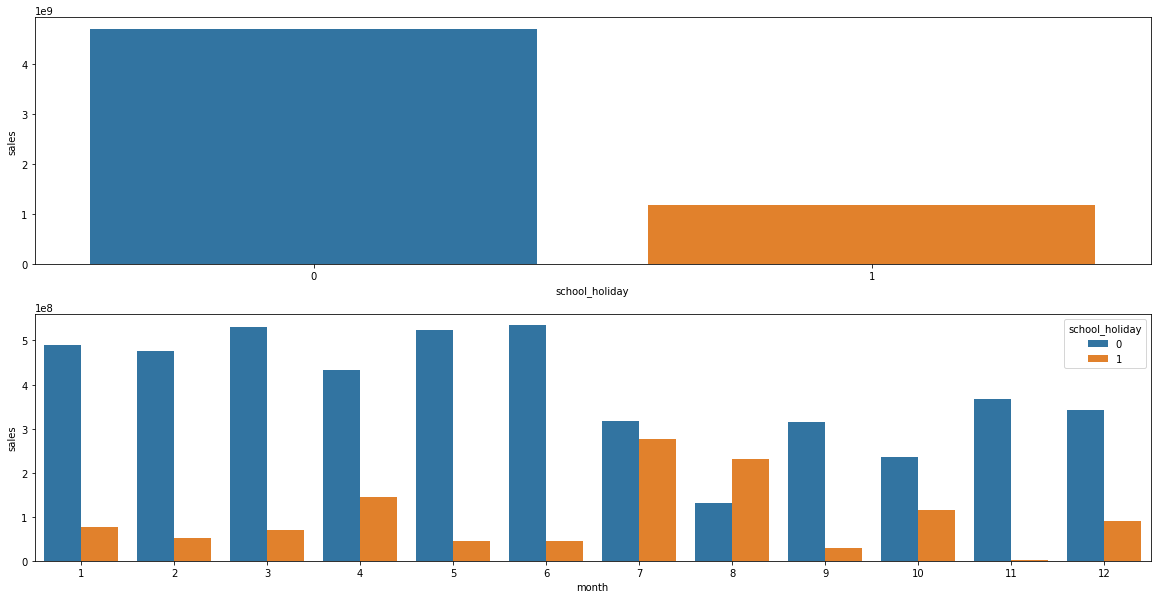

In [87]:
aux1 = df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()

plt.subplot( 2, 1, 1 )
sns.barplot( x='school_holiday', y='sales', data=aux1 )


aux2 = df4[['month', 'school_holiday', 'sales']].groupby(['month', 'school_holiday']).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='month', y='sales', hue='school_holiday', data=aux2 )                                                   

In [88]:
from tabulate import tabulate

In [89]:
tab = [['Hipoteses', 'Conclusao', 'Relevancia'], 
      ['H1', 'Falsa', 'Baixa'],
      ['H2', 'Falsa', 'Media'],
      ['H3', 'Falsa', 'Media'],
      ['H4', 'Falsa', 'Baixa'],
      ['H5', '-','-'],
      ['H6', 'Falsa', 'Baixa'],
      ['H7', 'Falsa', 'Baixa'],
      ['H8', 'Falsa', 'Media'],
      ['H9', 'Falsa', 'Media'],
      ['H10', 'Falsa', 'Alta'],
      ['H11', 'Verdadeira', 'Alta'],
      ['H12', 'Verdadeira', 'Alta'],
      ['H13', 'Verdadeira', 'Alta'],
      ]
print( tabulate(tab, headers='firstrow') )

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H6           Falsa        Baixa
H7           Falsa        Baixa
H8           Falsa        Media
H9           Falsa        Media
H10          Falsa        Alta
H11          Verdadeira   Alta
H12          Verdadeira   Alta
H13          Verdadeira   Alta


# 4.3 Analise Multivariada:

### 4.3.1 Numerical Attributes

In [90]:
num_attributes.head()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0
1,2,5,6064,625,1,1,1,570.0,11,2007,1,13,2010,1
2,3,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011,1
3,4,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015,0
4,5,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015,0


<AxesSubplot:>

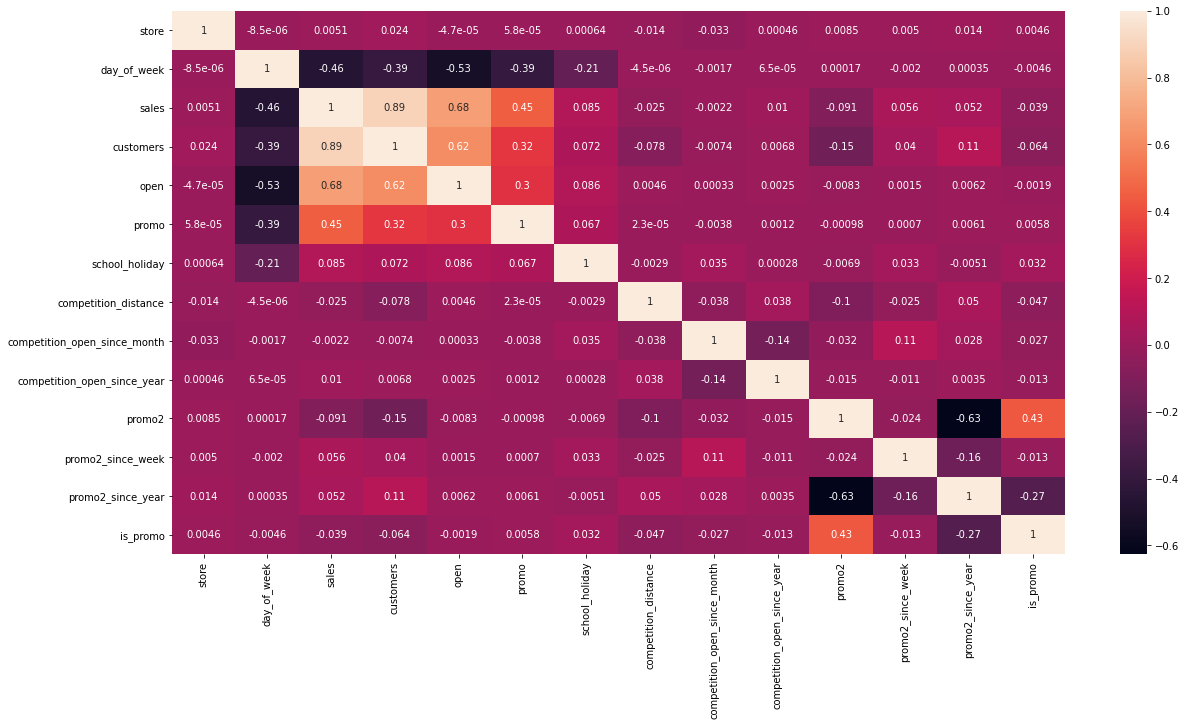

In [91]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True )

### 4.3.2 Categorical Attributes

In [92]:
a = df4.select_dtypes( include='object')

In [93]:
a.head()

,state_holiday,store_type,assortment,year_week
0,regular_day,c,basic,2015-30
1,regular_day,a,basic,2015-30
2,regular_day,a,basic,2015-30
3,regular_day,c,extendend,2015-30
4,regular_day,a,basic,2015-30


In [94]:
pd.crosstab( a['state_holiday'], a['store_type'] )

store_type,a,b,c,d
state_holiday,,,,
christmas,4,66,0,1
easter_holiday,36,100,0,9
public_holiday,236,285,65,108
regular_day,456766,15109,112903,258650


In [95]:
cm = pd.crosstab( a['state_holiday'], a['store_type'] ).values

In [96]:
chi2 = ss.chi2_contingency( cm )[0]

In [97]:
chi2

12792.159524019908

In [98]:
n = cm.sum()

r, k = cm.shape

In [99]:
v = np.sqrt( (chi2/n) / ( min( k-1,r-1 ) ) ) 

In [100]:
v

0.07106457093267678

In [101]:
def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    
    return np.sqrt( (chi2/n) / ( min( k-1, r-1 ) ) )

In [102]:
cramer_v( a['state_holiday'], a['store_type'] )

0.07106457093267678

In [103]:
def cramer_v(x, y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k= cm.shape
    
    chi2 = ss.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( (chi2corr/n) / ( min(kcorr-1, rcorr-1 ) ) )

In [104]:
cramer_v( a['state_holiday'], a['store_type'] )

0.07106469715258833

In [105]:
a1 = cramer_v( a['state_holiday'], a['state_holiday'] )
a2 = cramer_v( a['state_holiday'], a['store_type'] )
a3 = cramer_v( a['state_holiday'], a['assortment'] )

a4 = cramer_v( a['store_type'], a['state_holiday'] )
a5 = cramer_v( a['store_type'], a['store_type'] )
a6 = cramer_v( a['store_type'], a['assortment'] )

a7 = cramer_v( a['assortment'], a['state_holiday'] )
a8 = cramer_v( a['assortment'], a['store_type'] )
a9 = cramer_v( a['assortment'], a['assortment'] )

d = pd.DataFrame( {'state_holiday': [a1,a2,a3],
                    'store_type': [a4,a5,a6],
                    'assortment': [a7,a8,a9] })

d = d.set_index( d.columns )

In [106]:
d

,state_holiday,store_type,assortment
state_holiday,1.000002,0.071065,0.067546
store_type,0.071065,1.000002,0.538457
assortment,0.067546,0.538457,1.000001


<AxesSubplot:>

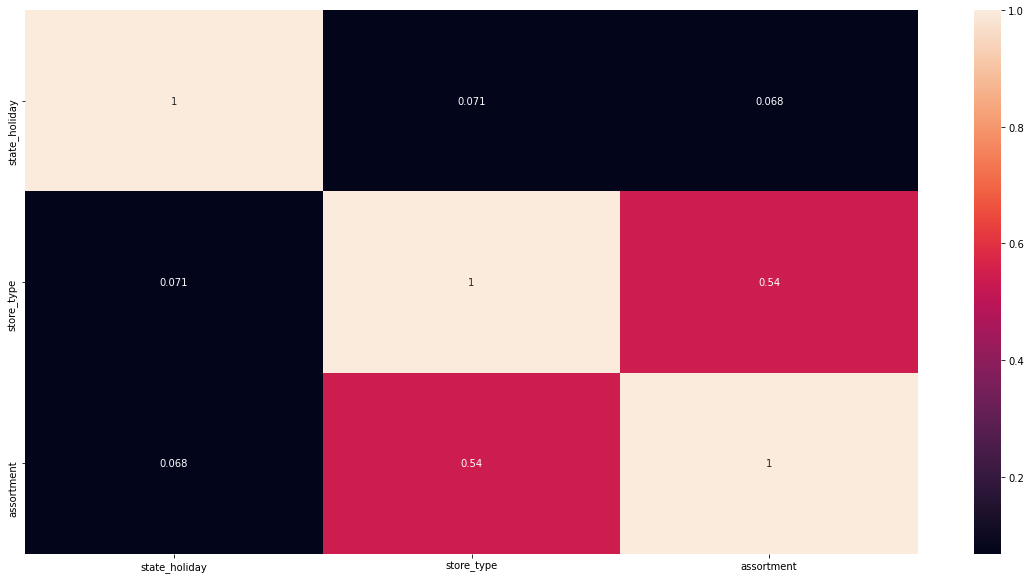

In [107]:
sns.heatmap( d, annot=True )

# 5.0 PASSO 05 - DATA PREPARATION

### 5.1 Normalização:

### 5.2 Rescaling:

In [108]:
df5 = df4.copy()

In [109]:
a = df5.select_dtypes( include=['int64','float64'] )

In [110]:
a.head()

,store,day_of_week,sales,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,week_of_year,day
0,1,5,5263,1,1,1270.0,9,2008,0,31,2015,0,2015,7,31,31
1,2,5,6064,1,1,570.0,11,2007,1,13,2010,1,2015,7,31,31
2,3,5,8314,1,1,14130.0,12,2006,1,14,2011,1,2015,7,31,31
3,4,5,13995,1,1,620.0,9,2009,0,31,2015,0,2015,7,31,31
4,5,5,4822,1,1,29910.0,4,2015,0,31,2015,0,2015,7,31,31


C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

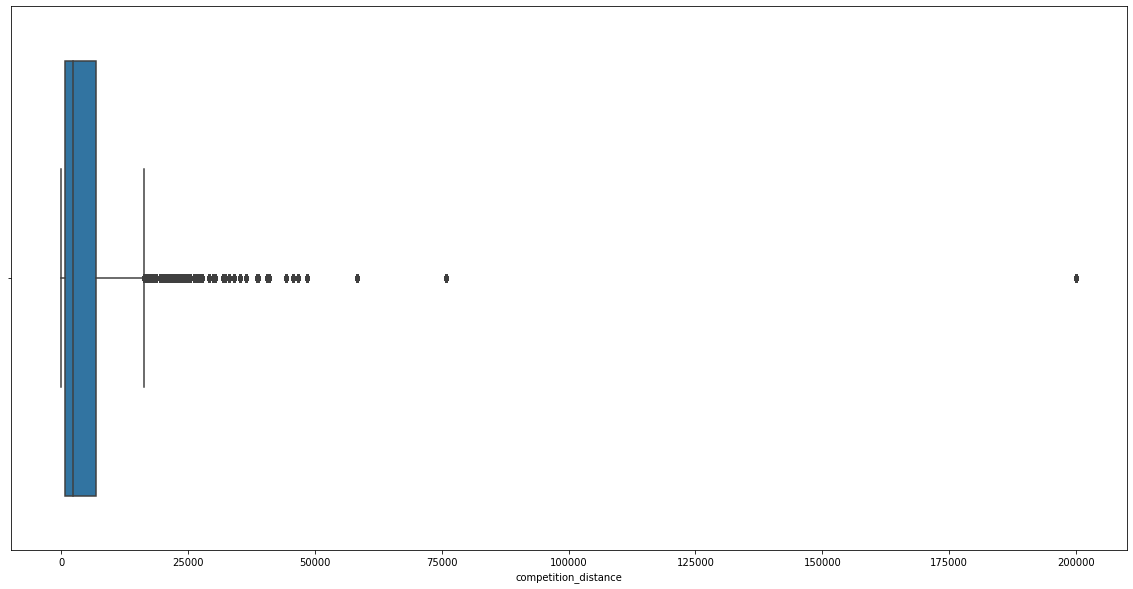

In [120]:
# competition distance

sns.boxplot( df5['competition_distance'] )
plt.rcParams["figure.size"]=(10,10)

In [121]:
rs = RobustScaler()
mns = MinMaxScaler()

# competition distance
df5['competition_distance'] = rs.fit_transform( df5[['competition_distance']].values )

C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

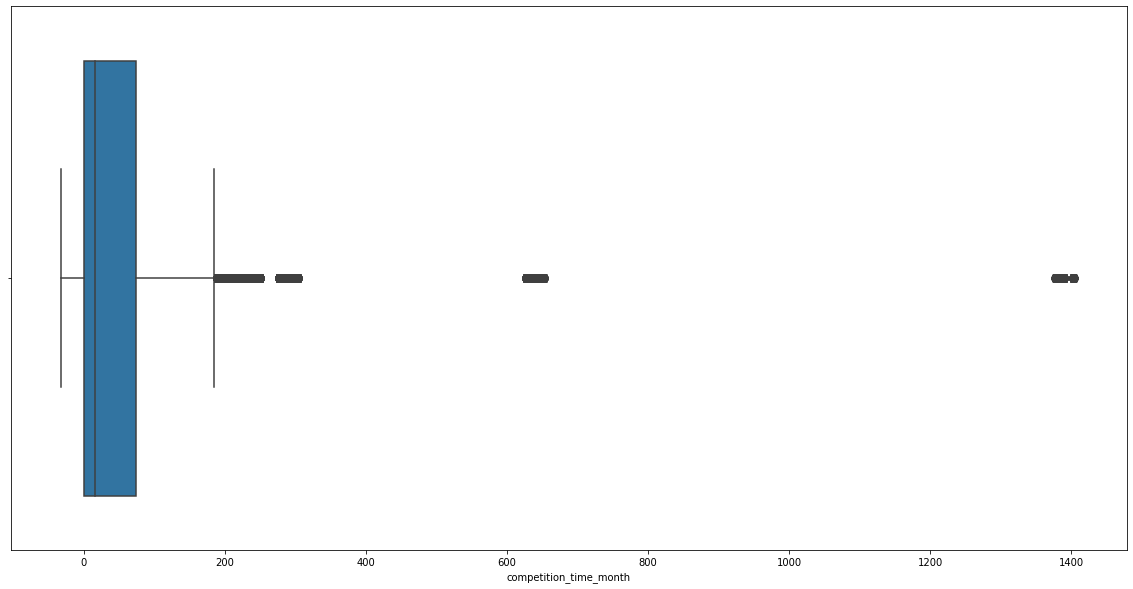

In [122]:
# competition time month

sns.boxplot( df5['competition_time_month'] )
plt.rcParams["figure.size"]=(10,10)

In [123]:
# competition time month
df5['competition_time_month'] = rs.fit_transform( df5[['competition_time_month']].values )

C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='promo_time_week'>

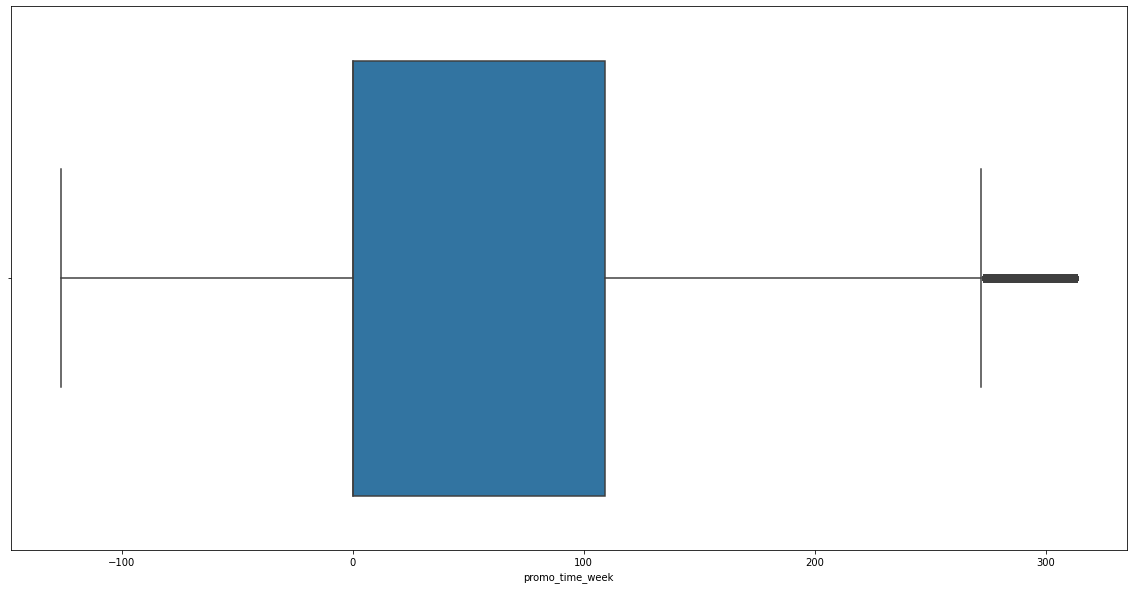

In [124]:
# promo time week

sns.boxplot( df5['promo_time_week'] )
#plt.rcParams["figure.size"]=(10,10)

In [125]:
df5['promo_time_week'] = mns.fit_transform( df5[['promo_time_week']].values )

C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

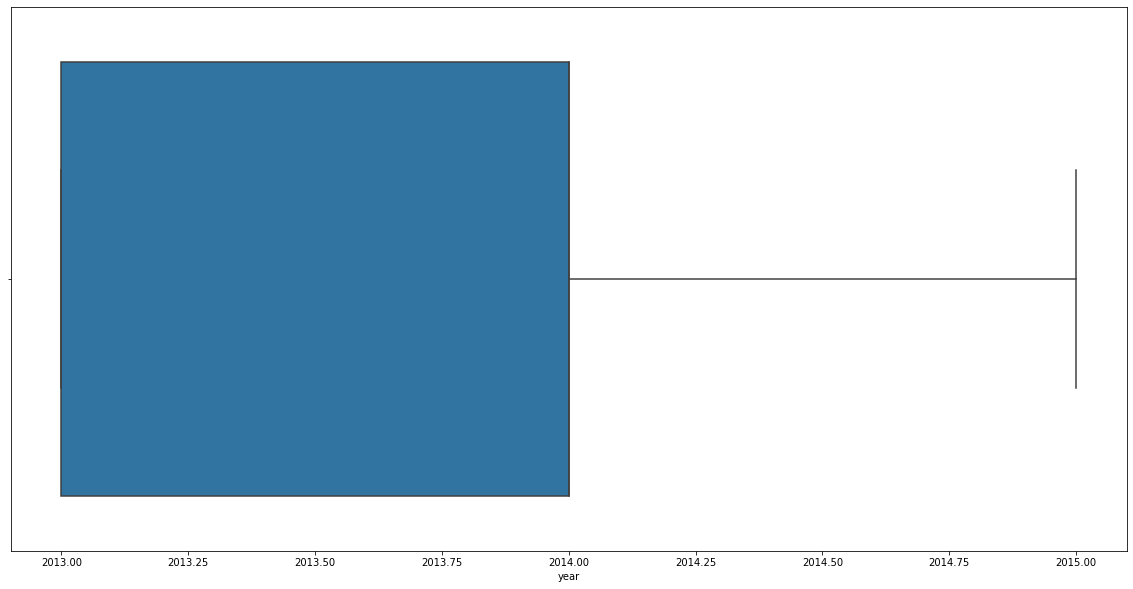

In [126]:
sns.boxplot( df5['year'] )
#plt.rcParams["figure.size"]=(10,10)

In [127]:
df5['year'] = mns.fit_transform( df5[['year']].values )

### 5.3 Transformação:

#### 5.3.1 Encoding

In [128]:
df5.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,week_of_year,day,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,-0.170968,...,0,1.0,7,31,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,-0.283871,...,1,1.0,7,31,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,1.903226,...,1,1.0,7,31,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822
3,4,5,2015-07-31,13995,1,regular_day,1,c,extendend,-0.275806,...,0,1.0,7,31,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,4.448387,...,0,1.0,7,31,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016


In [130]:
# state_holiday - "One hot encoding"
df5 = pd.get_dummies( df5, prefix=['state_holiday'], columns=['state_holiday'] )

In [133]:
# store_type - "Label encoding"

le = LabelEncoder()
df5['store_type'] = le.fit_transform( df5['store_type'] )

In [135]:
# assortment - "Ordinal encoding"

assortment_dict = { 'basic': 1, 'extra': 2, 'extendend': 3 }
df5['assortment'] = df5['assortment'].map( assortment_dict )

In [136]:
df5.head()

,store,day_of_week,date,sales,promo,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,...,day,year_week,competition_since,competition_time_month,promo_since,promo_time_week,state_holiday_christmas,state_holiday_easter_holiday,state_holiday_public_holiday,state_holiday_regular_day
0,1,5,2015-07-31,5263,1,1,2,1,-0.170968,9,...,31,2015-30,2008-09-01,0.918919,2015-07-27,0.287016,0,0,0,1
1,2,5,2015-07-31,6064,1,1,0,1,-0.283871,11,...,31,2015-30,2007-11-01,1.054054,2010-03-22,0.922551,0,0,0,1
2,3,5,2015-07-31,8314,1,1,0,1,1.903226,12,...,31,2015-30,2006-12-01,1.202703,2011-03-28,0.801822,0,0,0,1
3,4,5,2015-07-31,13995,1,1,2,3,-0.275806,9,...,31,2015-30,2009-09-01,0.743243,2015-07-27,0.287016,0,0,0,1
4,5,5,2015-07-31,4822,1,1,0,1,4.448387,4,...,31,2015-30,2015-04-01,-0.162162,2015-07-27,0.287016,0,0,0,1


In [ ]:
# month
# day
# week_of_year
# day_of_week